# 🎯 AdaBoost - Adaptive Boosting Ensemble Learning

**Module 03: Ensemble Learning Algorithms**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Boosting vs Bagging** - Sequential learning vs parallel averaging
2. **AdaBoost Algorithm** - Adaptive weighting mechanism
3. **Sample Weights** - How errors influence next iteration
4. **Weak Learners** - Why simple models work best
5. **Stagewise Additive Modeling** - Weighted combination of models
6. **Learning Rate** - Control contribution of each weak learner
7. **Hyperparameter Tuning** - Optimize n_estimators, learning_rate, base_estimator


## 📚 Section 1: Theoretical Foundation

### What is Boosting?

**Core Idea:** Train models sequentially, each focusing on mistakes of previous models

**Analogy:**
```
Bagging (Random Forest):          Boosting (AdaBoost):
  Parallel learning                  Sequential learning
  Independent models                 Each model learns from previous
  All models equal weight            Models weighted by performance
  Reduces variance                   Reduces bias AND variance

Like:
  Crowd of experts voting           Teacher correcting student step-by-step
  independently                     (focus on what you got wrong!)
```

---

### 🎯 AdaBoost: Adaptive Boosting

**Key Innovation:** Adaptive sample weighting

**Visual Process:**
```
Round 1:
========
Data: ○ ○ ○ ○ ○ ○ ○ ○ ○ ○  (all equal weight)
      ↓
Train Weak Learner 1
      ↓
Predictions: ✓ ✓ ✗ ✓ ✓ ✗ ✓ ✓ ✓ ✗
             correct   wrong

Round 2:
========
Data: ○ ○ ● ○ ○ ● ○ ○ ○ ●  (wrong samples get bigger weight)
      ↓
Train Weak Learner 2 (focuses on ●)
      ↓
Predictions: ✓ ✓ ✓ ✓ ✓ ✓ ✗ ✓ ✓ ✓

Round 3:
========
Data: ○ ○ ○ ○ ○ ○ ● ○ ○ ○  (new mistakes get bigger weight)
      ↓
Train Weak Learner 3
      ...and so on

Final Prediction:
=================
Weighted Vote: α₁×Model₁ + α₂×Model₂ + α₃×Model₃ + ...
```

---

### 🧮 AdaBoost Algorithm (SAMME)

**Step-by-Step Process:**

**1. Initialize Sample Weights (all equal)**
```
w₁(i) = 1/N  for all samples i

Example (N=10):
w₁ = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
```

**2. For Each Round t = 1, 2, ..., T:**

**a) Train Weak Learner on Weighted Data**
```
hₜ = WeakLearner(X, y, weights=wₜ)

Note: Weak learner sees "heavier" wrong samples more
```

**b) Calculate Error Rate**
```
εₜ = Σ wₜ(i) × I(yᵢ ≠ hₜ(xᵢ))  /  Σ wₜ(i)
     i                               i

Translation: Weighted fraction of mistakes

Example:
Predictions: [✓, ✓, ✗, ✓, ✗]
Weights:     [0.1, 0.1, 0.2, 0.1, 0.3]
εₜ = (0.2 + 0.3) / (0.1+0.1+0.2+0.1+0.3) = 0.5/0.8 = 0.625
```

**c) Calculate Model Weight (α)**
```
αₜ = ln((1 - εₜ) / εₜ) + ln(K - 1)

Where K = number of classes

Intuition:
• Low error (εₜ → 0): αₜ is large (model trusted)
• High error (εₜ → 0.5): αₜ is small (model not trusted)
• Error > 0.5: αₜ negative (model reversed)

Example (K=2, binary):
εₜ = 0.1  → αₜ = ln(0.9/0.1) = 2.20 (strong learner)
εₜ = 0.3  → αₜ = ln(0.7/0.3) = 0.85 (decent learner)
εₜ = 0.5  → αₜ = ln(0.5/0.5) = 0.00 (random)
εₜ = 0.7  → αₜ = ln(0.3/0.7) = -0.85 (flip predictions!)
```

**d) Update Sample Weights**
```
wₜ₊₁(i) = wₜ(i) × exp(αₜ × I(yᵢ ≠ hₜ(xᵢ)))

Then normalize: wₜ₊₁(i) = wₜ₊₁(i) / Σ wₜ₊₁(j)
                                     j

Intuition:
• Correct prediction: weight unchanged
• Wrong prediction: weight multiplied by exp(αₜ)

Example (αₜ = 1.0):
Correct: 0.1 × exp(0) = 0.1 × 1.0 = 0.1 (same)
Wrong:   0.1 × exp(1.0) = 0.1 × 2.72 = 0.272 (increased!)

After normalization, wrong samples "heavier" in next round
```

**3. Final Prediction (Weighted Vote)**
```
Classification:
H(x) = sign(Σ αₜ × hₜ(x))
            t

Or for multiclass:
H(x) = argmax Σ αₜ × I(hₜ(x) = k)
       k     t

Example (3 models, binary):
Model 1: predicts +1, α₁ = 0.8
Model 2: predicts -1, α₂ = 0.5
Model 3: predicts +1, α₃ = 1.2

Weighted sum: 0.8(+1) + 0.5(-1) + 1.2(+1) = 0.8 - 0.5 + 1.2 = 1.5
Final: sign(1.5) = +1
```

---

### 🤔 Why Weak Learners?

**Weak Learner Definition:** Model slightly better than random (accuracy > 50%)

**Why Not Strong Learners?**
```
Strong Learner (Deep Tree):
✗ Low bias, high variance
✗ Overfits easily
✗ Already captures everything
✗ Hard for next model to improve

Weak Learner (Decision Stump):
✓ High bias, low variance
✓ Underfits (simple)
✓ Leaves room for improvement
✓ Sequential models fix mistakes
```

**Common Weak Learners:**
- Decision stumps (depth=1)
- Shallow trees (depth=2-5)
- Linear models

**Analogy:**
```
Building a house:

One expert builder (Random Forest):
  Does everything at once
  Makes complete decisions

Team of specialists (AdaBoost):
  Foundation expert → Focus on base
  Framing expert → Fix frame issues
  Roofing expert → Fix roof issues
  Each fixes what previous missed
```

---

### 📊 AdaBoost vs Random Forest

| **Aspect** | **Random Forest (Bagging)** | **AdaBoost (Boosting)** |
|-----------|---------------------------|------------------------|
| **Training** | Parallel (independent) | Sequential (dependent) |
| **Sampling** | Bootstrap (with replacement) | Weighted sampling |
| **Model Weight** | Equal (1/N) | Performance-based (α) |
| **Focus** | Reduce variance | Reduce bias + variance |
| **Base Models** | Deep trees | Weak learners (stumps) |
| **Overfitting** | Resistant | Can overfit with many rounds |
| **Outliers** | Robust | Sensitive (increases weight) |
| **Speed** | Fast (parallel) | Slower (sequential) |
| **Interpretability** | Low | Medium (see weights) |

---

### 🎛️ Key Hyperparameters

| **Parameter** | **Effect** | **Typical Values** | **Impact** |
|--------------|-----------|-------------------|-----------|
| **n_estimators** | Number of weak learners | 50-500 | More = better fit (risk overfit) |
| **learning_rate** | Shrinkage factor | 0.01-1.0 | Lower = slower, more robust |
| **base_estimator** | Weak learner type | DecisionTreeClassifier(max_depth=1) | Complexity of each model |
| **algorithm** | SAMME or SAMME.R | 'SAMME.R' (default) | R version uses probabilities |

**Learning Rate Effect:**
```
Final Prediction = Σ (learning_rate × αₜ × hₜ(x))
                   t

learning_rate = 1.0:  Fast learning, risk overfit
learning_rate = 0.1:  Slower, more robust
learning_rate = 0.01: Very conservative, needs more estimators

Tradeoff: n_estimators ↑ ⟺ learning_rate ↓
```

---

### 📊 Advantages vs Disadvantages

| **Advantages ✅** | **Disadvantages ❌** |
|------------------|---------------------|
| High accuracy (often beats RF) | Sensitive to noisy data |
| Reduces bias + variance | Sensitive to outliers |
| Simple weak learners work | Sequential (can't parallelize) |
| Less data needed | Can overfit with too many rounds |
| Built-in feature importance | Slower training than RF |
| Handles imbalanced classes well | Requires careful tuning |
| No feature scaling needed | Performance degrades with noise |
| Interpretable weights | Black box for final model |

---

### 🎯 When to Use AdaBoost?

| **Use AdaBoost When** | **Avoid When** |
|----------------------|---------------|
| Clean, low-noise data | High noise/outliers in data |
| Need high accuracy | Need fast training |
| Weak learners sufficient | Data is very noisy |
| Bias reduction needed | Many outliers present |
| Interpretable weights desired | Need parallel training |
| Small-medium datasets | Very large datasets |
| Binary classification | Extremely imbalanced classes |

---

### 🔬 Mathematical Intuition

**Why Does It Work?**

**1. Exponential Loss Minimization:**
```
AdaBoost minimizes:
L = Σ exp(-yᵢ × f(xᵢ))
    i

Where f(x) = Σ αₜ × hₜ(x)
            t

Interpretation:
• Correct prediction (yᵢ × f(xᵢ) > 0): Loss → 0
• Wrong prediction (yᵢ × f(xᵢ) < 0): Loss → ∞

This heavily penalizes mistakes!
```

**2. Forward Stagewise Additive Modeling:**
```
Each round adds one model:
Fₜ(x) = Fₜ₋₁(x) + αₜ × hₜ(x)

Goal: Find (αₜ, hₜ) that minimizes:
Σ exp(-yᵢ × Fₜ(xᵢ))
i
```

**3. Margin Maximization:**
```
Margin = yᵢ × f(xᵢ)

Larger margin = more confident correct prediction
AdaBoost tries to maximize minimum margin

Example:
Correct with high confidence: y=+1, f(x)=+3 → margin=3 (good!)
Correct but uncertain:        y=+1, f(x)=+0.1 → margin=0.1 (risky)
Wrong:                        y=+1, f(x)=-2 → margin=-2 (bad!)
```


## 🔧 Section 2: Setup & Dataset Loading

In [4]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_wine, load_digits, make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2.1 Classification: Breast Cancer Dataset

In [7]:
# Load Breast Cancer Dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

print("📊 Breast Cancer Dataset (Classification)")
print(f"Shape: {df_cancer.shape}")
print(f"Features: {len(cancer.feature_names)}")
print(f"Classes: {cancer.target_names.tolist()}")
print(f"\nClass Distribution:")
print(df_cancer['target'].value_counts())
print("\n" + "="*70)
print(df_cancer.head())

📊 Breast Cancer Dataset (Classification)
Shape: (569, 31)
Features: 30
Classes: ['malignant', 'benign']

Class Distribution:
target
1    357
0    212
Name: count, dtype: int64

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0

In [9]:
# Split data
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

print(f"\n✂️ Data Split:")
print(f"Training: {X_train_c.shape[0]} samples")
print(f"Testing: {X_test_c.shape[0]} samples")
print(f"Features: {X_train_c.shape[1]}")

print("\n💡 Note: AdaBoost doesn't require feature scaling!")


✂️ Data Split:
Training: 455 samples
Testing: 114 samples
Features: 30

💡 Note: AdaBoost doesn't require feature scaling!


### 2.2 Additional Dataset: Wine Classification

In [12]:
# Load Wine Dataset (multiclass)
wine = load_wine(as_frame=True)
df_wine = wine.frame

print("\n📊 Wine Dataset (Multiclass Classification)")
print(f"Shape: {df_wine.shape}")
print(f"Features: {len(wine.feature_names)}")
print(f"Classes: {wine.target_names.tolist()}")
print(f"\nClass Distribution:")
print(df_wine['target'].value_counts())


📊 Wine Dataset (Multiclass Classification)
Shape: (178, 14)
Features: 13
Classes: ['class_0', 'class_1', 'class_2']

Class Distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [14]:
# Split wine data
X_wine = df_wine.drop('target', axis=1)
y_wine = df_wine['target']

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

print(f"\n✂️ Wine Data Split:")
print(f"Training: {X_train_w.shape[0]} samples")
print(f"Testing: {X_test_w.shape[0]} samples")


✂️ Wine Data Split:
Training: 142 samples
Testing: 36 samples


## 🧪 Section 3: Single Weak Learner vs AdaBoost

### 3.1 Training Single Decision Stump (Weak Learner)

In [18]:
# Train single decision stump (depth=1)
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train_c, y_train_c)

# Predictions
y_pred_stump = stump.predict(X_test_c)

# Evaluate
stump_train_acc = stump.score(X_train_c, y_train_c)
stump_test_acc = accuracy_score(y_test_c, y_pred_stump)

print("📊 Single Decision Stump Performance (max_depth=1):")
print(f"Training Accuracy: {stump_train_acc:.4f}")
print(f"Testing Accuracy:  {stump_test_acc:.4f}")
print(f"Features Used: 1 (single split)")
print(f"\n💡 This is a WEAK learner (only slightly better than random 50%)")

📊 Single Decision Stump Performance (max_depth=1):
Training Accuracy: 0.9231
Testing Accuracy:  0.9211
Features Used: 1 (single split)

💡 This is a WEAK learner (only slightly better than random 50%)


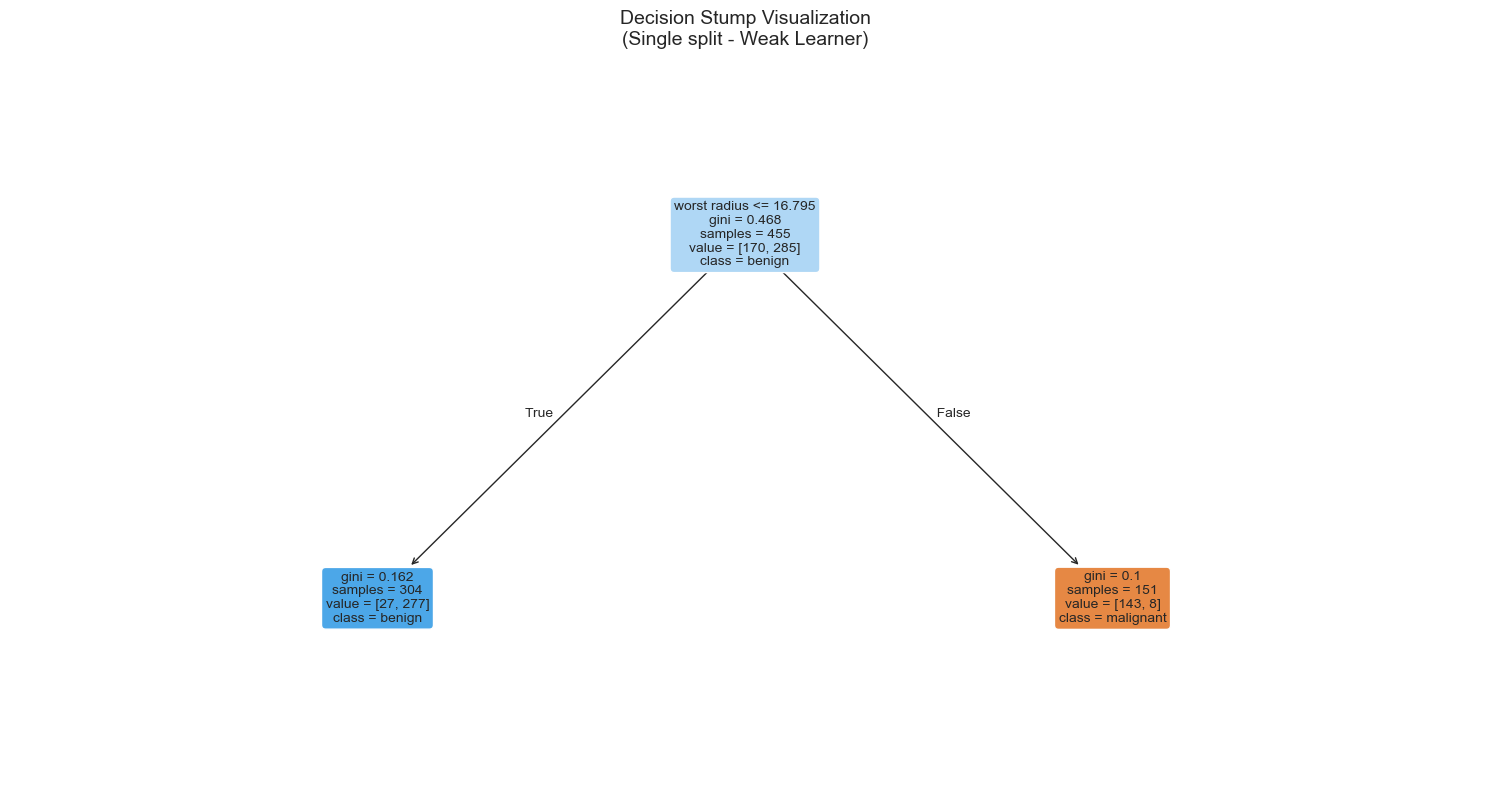


🌳 Tree uses feature: worst radius


In [20]:
# Visualize the decision stump
plt.figure(figsize=(15, 8))
plot_tree(stump, 
          feature_names=cancer.feature_names,
          class_names=cancer.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Stump Visualization\n(Single split - Weak Learner)", fontsize=14)
plt.tight_layout()
plt.show()

print(f"\n🌳 Tree uses feature: {cancer.feature_names[stump.tree_.feature[0]]}")

### 3.2 Training AdaBoost (50 Stumps)


In [23]:
# Train AdaBoost with decision stumps
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)
ada_clf.fit(X_train_c, y_train_c)

# Predictions
y_pred_ada = ada_clf.predict(X_test_c)

# Evaluate
ada_train_acc = ada_clf.score(X_train_c, y_train_c)
ada_test_acc = accuracy_score(y_test_c, y_pred_ada)

print("\n📊 AdaBoost Performance (50 stumps):")
print(f"Training Accuracy: {ada_train_acc:.4f}")
print(f"Testing Accuracy:  {ada_test_acc:.4f}")
print(f"Gap (Overfitting): {ada_train_acc - ada_test_acc:.4f}")
print(f"Number of Models:  {ada_clf.n_estimators}")


📊 AdaBoost Performance (50 stumps):
Training Accuracy: 1.0000
Testing Accuracy:  0.9561
Gap (Overfitting): 0.0439
Number of Models:  50


### 3.3 Comparison: Single Stump vs AdaBoost

In [26]:
# Train Random Forest for comparison
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_c, y_train_c)

# Create comparison
comparison = pd.DataFrame({
    'Model': ['Single Decision Stump', 'AdaBoost (50 stumps)', 'Random Forest (50 trees)'],
    'Train Accuracy': [stump_train_acc, ada_train_acc, rf_clf.score(X_train_c, y_train_c)],
    'Test Accuracy': [stump_test_acc, ada_test_acc, rf_clf.score(X_test_c, y_test_c)],
    'Complexity': ['1 split', '50 stumps', '50 deep trees'],
    'Training': ['Instant', 'Sequential', 'Parallel']
})

print("\n📊 COMPARISON: Weak Learner vs Ensemble Methods")
print("="*70)
print(comparison.to_string(index=False))


📊 COMPARISON: Weak Learner vs Ensemble Methods
                   Model  Train Accuracy  Test Accuracy    Complexity   Training
   Single Decision Stump        0.923077       0.921053       1 split    Instant
    AdaBoost (50 stumps)        1.000000       0.956140     50 stumps Sequential
Random Forest (50 trees)        1.000000       0.956140 50 deep trees   Parallel


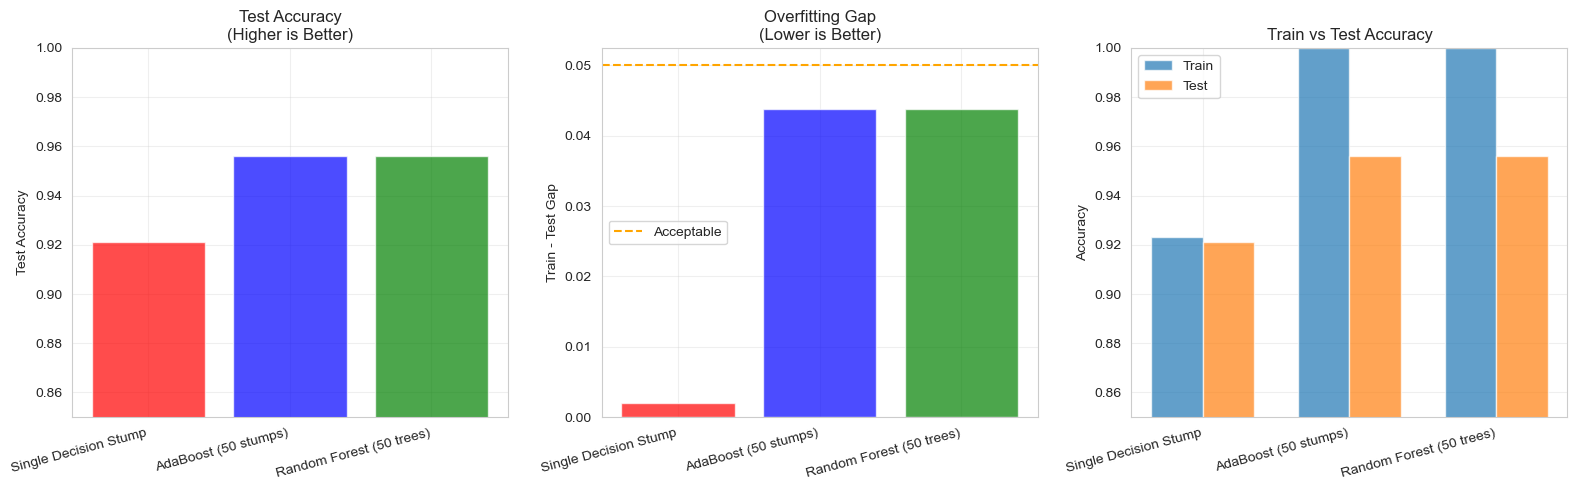


💡 Key Observations:
  • Single stump: Poor performance (weak learner)
  • AdaBoost: Combines weak learners → strong learner
  • Competitive with Random Forest!


In [28]:
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = comparison['Model']
colors = ['red', 'blue', 'green']

# Test Accuracy
axes[0].bar(range(len(models)), comparison['Test Accuracy'], alpha=0.7, color=colors)
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=15, ha='right')
axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('Test Accuracy\n(Higher is Better)')
axes[0].set_ylim([0.85, 1.0])
axes[0].grid(True, alpha=0.3)

# Overfitting Gap
gaps = comparison['Train Accuracy'] - comparison['Test Accuracy']
axes[1].bar(range(len(models)), gaps, alpha=0.7, color=colors)
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=15, ha='right')
axes[1].set_ylabel('Train - Test Gap')
axes[1].set_title('Overfitting Gap\n(Lower is Better)')
axes[1].axhline(y=0.05, color='orange', linestyle='--', label='Acceptable')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Training vs Testing
x = np.arange(len(models))
width = 0.35
axes[2].bar(x - width/2, comparison['Train Accuracy'], width, label='Train', alpha=0.7)
axes[2].bar(x + width/2, comparison['Test Accuracy'], width, label='Test', alpha=0.7)
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Train vs Test Accuracy')
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=15, ha='right')
axes[2].set_ylim([0.85, 1.0])
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Key Observations:")
print("  • Single stump: Poor performance (weak learner)")
print("  • AdaBoost: Combines weak learners → strong learner")
print("  • Competitive with Random Forest!")

## 📊 Section 4: Sequential Learning Process

### 4.1 Impact of Number of Estimators

In [32]:
# Test different numbers of estimators
n_estimators_range = [1, 5, 10, 25, 50, 100, 200, 300, 500]
train_scores_ada = []
test_scores_ada = []

print("\n🔍 Testing different numbers of weak learners:")
print("="*70)

for n_est in n_estimators_range:
    ada_temp = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_est,
        random_state=42
    )
    ada_temp.fit(X_train_c, y_train_c)
    
    train_scores_ada.append(ada_temp.score(X_train_c, y_train_c))
    test_scores_ada.append(ada_temp.score(X_test_c, y_test_c))
    
    print(f"Estimators: {n_est:>3} → Train: {train_scores_ada[-1]:.4f} | Test: {test_scores_ada[-1]:.4f}")


🔍 Testing different numbers of weak learners:
Estimators:   1 → Train: 0.9231 | Test: 0.9211
Estimators:   5 → Train: 0.9648 | Test: 0.9298
Estimators:  10 → Train: 0.9824 | Test: 0.9649
Estimators:  25 → Train: 1.0000 | Test: 0.9474
Estimators:  50 → Train: 1.0000 | Test: 0.9561
Estimators: 100 → Train: 1.0000 | Test: 0.9561
Estimators: 200 → Train: 1.0000 | Test: 0.9649
Estimators: 300 → Train: 1.0000 | Test: 0.9649
Estimators: 500 → Train: 1.0000 | Test: 0.9649


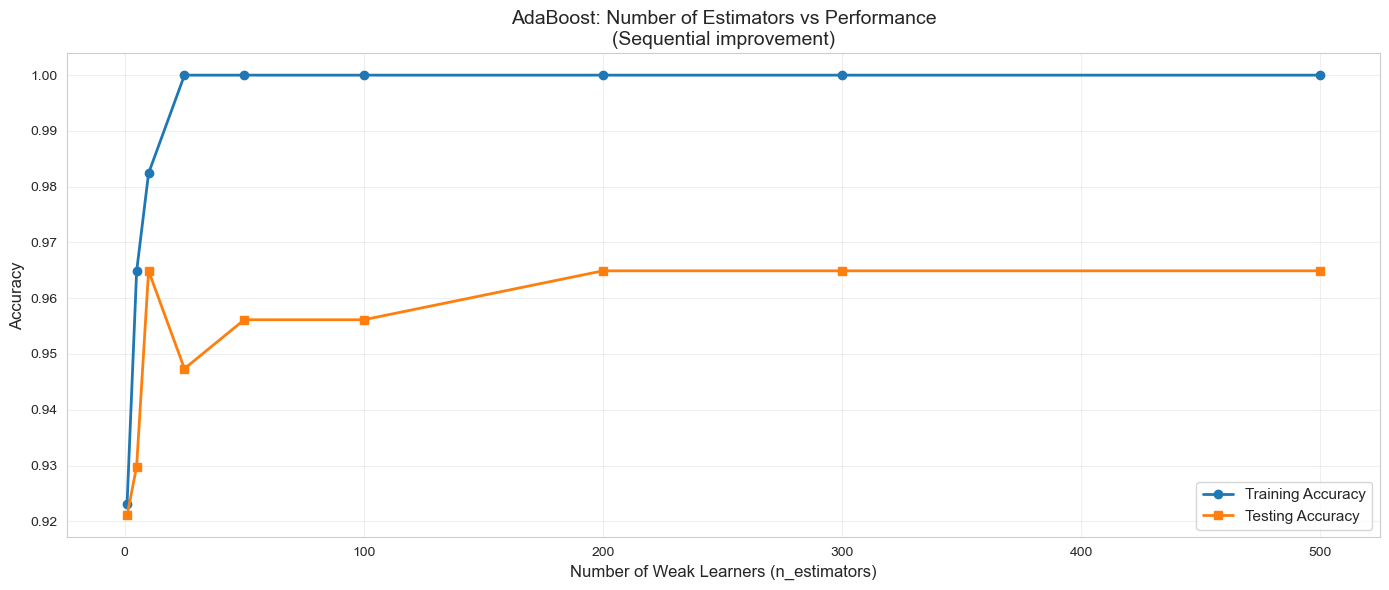


💡 Observations:
  • Single stump (n=1): 0.9211 accuracy
  • 50 stumps: 0.9561 accuracy
  • 500 stumps: 0.9649 accuracy
  • Performance improves rapidly, then saturates
  • Risk of overfitting with too many estimators!


In [33]:
# Plot n_estimators vs performance
plt.figure(figsize=(14, 6))

plt.plot(n_estimators_range, train_scores_ada, label='Training Accuracy', 
         marker='o', linewidth=2, markersize=6)
plt.plot(n_estimators_range, test_scores_ada, label='Testing Accuracy', 
         marker='s', linewidth=2, markersize=6)

plt.xlabel('Number of Weak Learners (n_estimators)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('AdaBoost: Number of Estimators vs Performance\n(Sequential improvement)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print(f"  • Single stump (n=1): {test_scores_ada[0]:.4f} accuracy")
print(f"  • 50 stumps: {test_scores_ada[4]:.4f} accuracy")
print(f"  • 500 stumps: {test_scores_ada[-1]:.4f} accuracy")
print("  • Performance improves rapidly, then saturates")
print("  • Risk of overfitting with too many estimators!")

### 4.2 Visualizing Sequential Learning


In [37]:
# Train models with increasing estimators and track cumulative performance
n_range = range(1, 101)
train_errors = []
test_errors = []

ada_sequential = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
ada_sequential.fit(X_train_c, y_train_c)

# Get staged predictions
for train_pred, test_pred in zip(
    ada_sequential.staged_predict(X_train_c),
    ada_sequential.staged_predict(X_test_c)
):
    train_errors.append(1 - accuracy_score(y_train_c, train_pred))
    test_errors.append(1 - accuracy_score(y_test_c, test_pred))

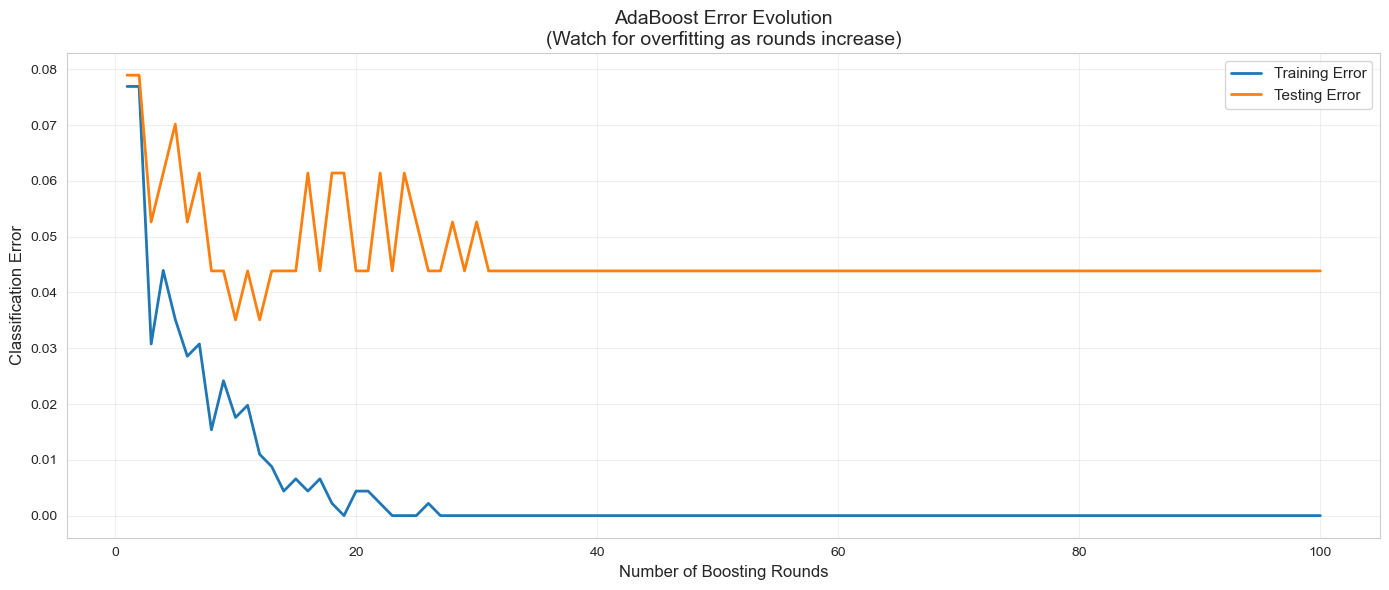


📈 Error Evolution Analysis:
Initial test error: 0.0789
Final test error: 0.0439
Improvement: 0.0351

🎯 Optimal number of estimators: 10
Best test error: 0.0351


In [39]:
# Plot error evolution
plt.figure(figsize=(14, 6))

plt.plot(n_range, train_errors, label='Training Error', linewidth=2)
plt.plot(n_range, test_errors, label='Testing Error', linewidth=2)
plt.xlabel('Number of Boosting Rounds', fontsize=12)
plt.ylabel('Classification Error', fontsize=12)
plt.title('AdaBoost Error Evolution\n(Watch for overfitting as rounds increase)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Error Evolution Analysis:")
print(f"Initial test error: {test_errors[0]:.4f}")
print(f"Final test error: {test_errors[-1]:.4f}")
print(f"Improvement: {test_errors[0] - test_errors[-1]:.4f}")

# Find minimum test error
min_test_idx = np.argmin(test_errors)
print(f"\n🎯 Optimal number of estimators: {min_test_idx + 1}")
print(f"Best test error: {test_errors[min_test_idx]:.4f}")

## 📊 Section 5: Model Weights and Feature Importance

### 5.1 Analyzing Estimator Weights (Alpha)

In [43]:
# Get estimator weights
estimator_weights = ada_clf.estimator_weights_
estimator_errors = ada_clf.estimator_errors_

# Create DataFrame
weights_df = pd.DataFrame({
    'Estimator': range(1, len(estimator_weights) + 1),
    'Weight (α)': estimator_weights,
    'Error': estimator_errors,
    'Contribution': estimator_weights / estimator_weights.sum() * 100
})

print("\n📊 Top 10 Estimators by Weight:")
print("="*70)
print(weights_df.nlargest(10, 'Weight (α)').to_string(index=False))

print("\n📊 Bottom 10 Estimators by Weight:")
print(weights_df.nsmallest(10, 'Weight (α)').to_string(index=False))


📊 Top 10 Estimators by Weight:
 Estimator  Weight (α)    Error  Contribution
         1    2.484907 0.076923      5.896254
         3    1.807182 0.140979      4.288131
         2    1.743969 0.148810      4.138137
         6    1.355212 0.205020      3.215685
         4    1.284951 0.216709      3.048966
         7    1.166927 0.237411      2.768916
         8    1.090694 0.251488      2.588027
        25    1.049713 0.259280      2.490787
        14    1.018640 0.265292      2.417057
         9    0.991544 0.270607      2.352763

📊 Bottom 10 Estimators by Weight:
 Estimator  Weight (α)    Error  Contribution
        44    0.339393 0.415957      0.805321
        46    0.388601 0.404054      0.922083
        19    0.400098 0.401289      0.949363
        47    0.413534 0.398065      0.981246
        37    0.524963 0.371692      1.245646
        49    0.532115 0.370024      1.262617
        45    0.541127 0.367926      1.284000
        21    0.558526 0.363889      1.325285
        48   

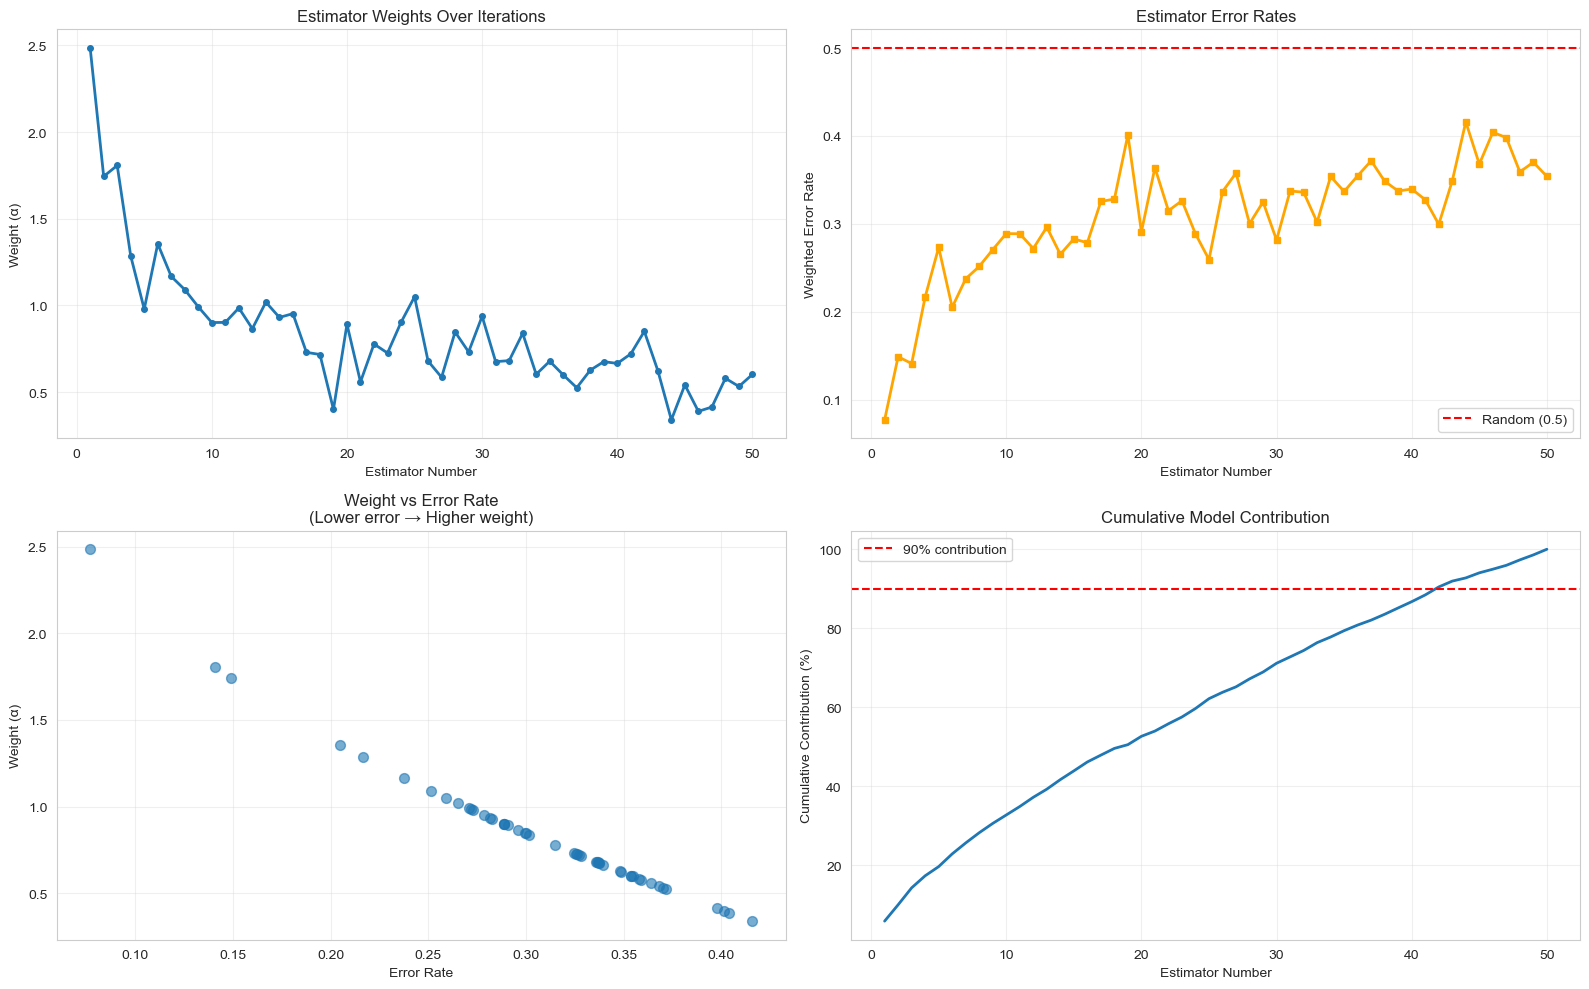


💡 Number of estimators for 90% contribution: 42/50


In [45]:
# Visualize estimator weights
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Weights over iterations
axes[0, 0].plot(weights_df['Estimator'], weights_df['Weight (α)'], 
                marker='o', linewidth=2, markersize=4)
axes[0, 0].set_xlabel('Estimator Number')
axes[0, 0].set_ylabel('Weight (α)')
axes[0, 0].set_title('Estimator Weights Over Iterations')
axes[0, 0].grid(True, alpha=0.3)

# Error rates
axes[0, 1].plot(weights_df['Estimator'], weights_df['Error'], 
                marker='s', linewidth=2, markersize=4, color='orange')
axes[0, 1].set_xlabel('Estimator Number')
axes[0, 1].set_ylabel('Weighted Error Rate')
axes[0, 1].set_title('Estimator Error Rates')
axes[0, 1].axhline(y=0.5, color='red', linestyle='--', label='Random (0.5)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Weight vs Error scatter
axes[1, 0].scatter(weights_df['Error'], weights_df['Weight (α)'], alpha=0.6, s=50)
axes[1, 0].set_xlabel('Error Rate')
axes[1, 0].set_ylabel('Weight (α)')
axes[1, 0].set_title('Weight vs Error Rate\n(Lower error → Higher weight)')
axes[1, 0].grid(True, alpha=0.3)

# Cumulative contribution
cumulative_contrib = np.cumsum(weights_df['Contribution'])
axes[1, 1].plot(weights_df['Estimator'], cumulative_contrib, linewidth=2)
axes[1, 1].axhline(y=90, color='red', linestyle='--', label='90% contribution')
axes[1, 1].set_xlabel('Estimator Number')
axes[1, 1].set_ylabel('Cumulative Contribution (%)')
axes[1, 1].set_title('Cumulative Model Contribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find estimators for 90% contribution
n_for_90 = np.argmax(cumulative_contrib >= 90) + 1
print(f"\n💡 Number of estimators for 90% contribution: {n_for_90}/{len(estimator_weights)}")

In [47]:
# Statistics
print("\n📊 Estimator Weight Statistics:")
print("="*70)
print(f"Mean weight: {estimator_weights.mean():.4f}")
print(f"Std dev:     {estimator_weights.std():.4f}")
print(f"Min weight:  {estimator_weights.min():.4f}")
print(f"Max weight:  {estimator_weights.max():.4f}")
print(f"Weight range: {estimator_weights.max() - estimator_weights.min():.4f}")

print(f"\n📊 Estimator Error Statistics:")
print(f"Mean error: {estimator_errors.mean():.4f}")
print(f"Min error:  {estimator_errors.min():.4f}")
print(f"Max error:  {estimator_errors.max():.4f}")


📊 Estimator Weight Statistics:
Mean weight: 0.8429
Std dev:     0.3768
Min weight:  0.3394
Max weight:  2.4849
Weight range: 2.1455

📊 Estimator Error Statistics:
Mean error: 0.3071
Min error:  0.0769
Max error:  0.4160


### 5.2 Feature Importance Analysis


In [50]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Importance': ada_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Top 15 Most Important Features:")
print("="*70)
print(feature_importance.head(15).to_string(index=False))


📊 Top 15 Most Important Features:
             Feature  Importance
       worst texture    0.124860
worst concave points    0.121384
          area error    0.101582
        worst radius    0.094089
    mean compactness    0.062895
     mean smoothness    0.057885
          worst area    0.053086
    worst smoothness    0.051761
      worst symmetry    0.051445
        mean texture    0.045747
        radius error    0.038193
     worst perimeter    0.037534
    smoothness error    0.033245
     worst concavity    0.027689
   compactness error    0.024171


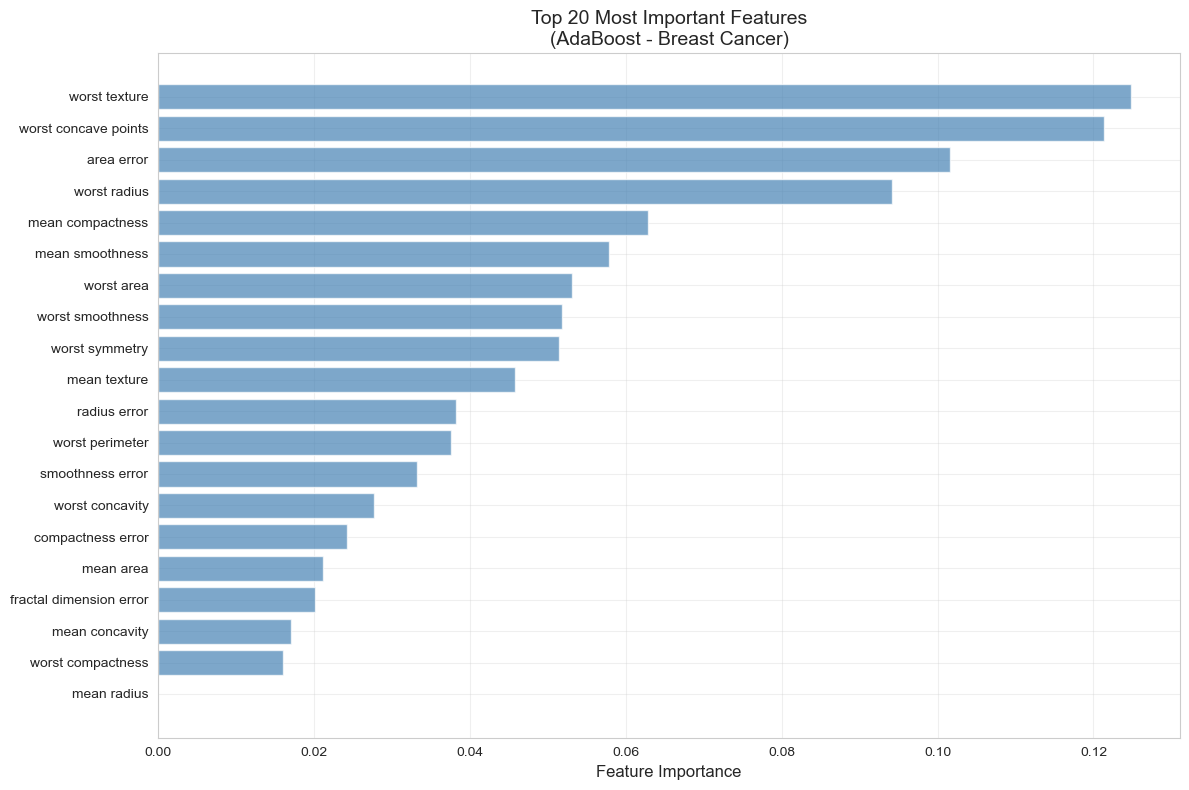

In [52]:
# Visualize feature importance
plt.figure(figsize=(12, 8))

top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['Importance'], alpha=0.7, color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 20 Most Important Features\n(AdaBoost - Breast Cancer)', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
# Compare with Random Forest feature importance
rf_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'RF_Importance': rf_clf.feature_importances_,
    'AdaBoost_Importance': ada_clf.feature_importances_
}).sort_values('AdaBoost_Importance', ascending=False)

print("\n📊 Feature Importance Comparison (Top 10):")
print("="*70)
print(rf_importance.head(10).to_string(index=False))


📊 Feature Importance Comparison (Top 10):
             Feature  RF_Importance  AdaBoost_Importance
       worst texture       0.017058             0.124860
worst concave points       0.129051             0.121384
          area error       0.038472             0.101582
        worst radius       0.113766             0.094089
    mean compactness       0.018974             0.062895
     mean smoothness       0.005043             0.057885
          worst area       0.088353             0.053086
    worst smoothness       0.011946             0.051761
      worst symmetry       0.008689             0.051445
        mean texture       0.008441             0.045747


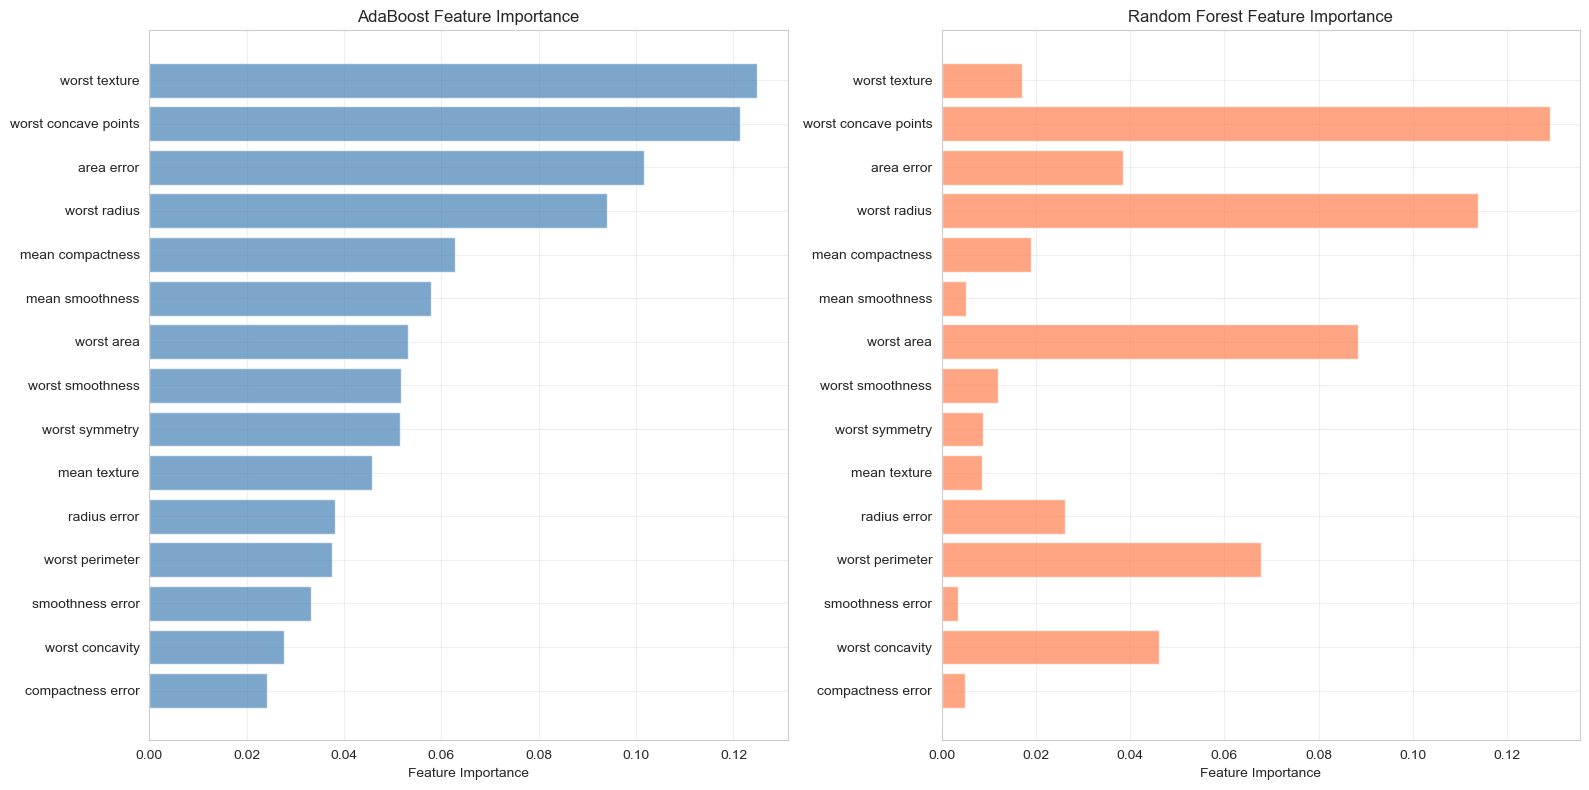

In [56]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# AdaBoost
top_ada = rf_importance.head(15)
axes[0].barh(range(len(top_ada)), top_ada['AdaBoost_Importance'], 
             alpha=0.7, color='steelblue')
axes[0].set_yticks(range(len(top_ada)))
axes[0].set_yticklabels(top_ada['Feature'])
axes[0].set_xlabel('Feature Importance')
axes[0].set_title('AdaBoost Feature Importance')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].barh(range(len(top_ada)), top_ada['RF_Importance'], 
             alpha=0.7, color='coral')
axes[1].set_yticks(range(len(top_ada)))
axes[1].set_yticklabels(top_ada['Feature'])
axes[1].set_xlabel('Feature Importance')
axes[1].set_title('Random Forest Feature Importance')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📊 Section 6: Impact of Learning Rate

### 6.1 Testing Different Learning Rates

In [60]:
# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0]
lr_results = []

print("\n🔍 Testing different learning rates (50 estimators):")
print("="*70)

for lr in learning_rates:
    ada_temp = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=lr,
        random_state=42
    )
    ada_temp.fit(X_train_c, y_train_c)
    
    train_acc = ada_temp.score(X_train_c, y_train_c)
    test_acc = ada_temp.score(X_test_c, y_test_c)
    
    lr_results.append({
        'learning_rate': lr,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Gap': train_acc - test_acc
    })
    
    print(f"learning_rate={lr:>4.2f} → Train: {train_acc:.4f} | Test: {test_acc:.4f} | Gap: {train_acc - test_acc:.4f}")

lr_df = pd.DataFrame(lr_results)


🔍 Testing different learning rates (50 estimators):
learning_rate=0.01 → Train: 0.9495 | Test: 0.9386 | Gap: 0.0109
learning_rate=0.05 → Train: 0.9692 | Test: 0.9474 | Gap: 0.0219
learning_rate=0.10 → Train: 0.9824 | Test: 0.9561 | Gap: 0.0263
learning_rate=0.50 → Train: 0.9978 | Test: 0.9561 | Gap: 0.0417
learning_rate=1.00 → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439
learning_rate=1.50 → Train: 1.0000 | Test: 0.9649 | Gap: 0.0351
learning_rate=2.00 → Train: 0.9824 | Test: 0.9737 | Gap: 0.0087


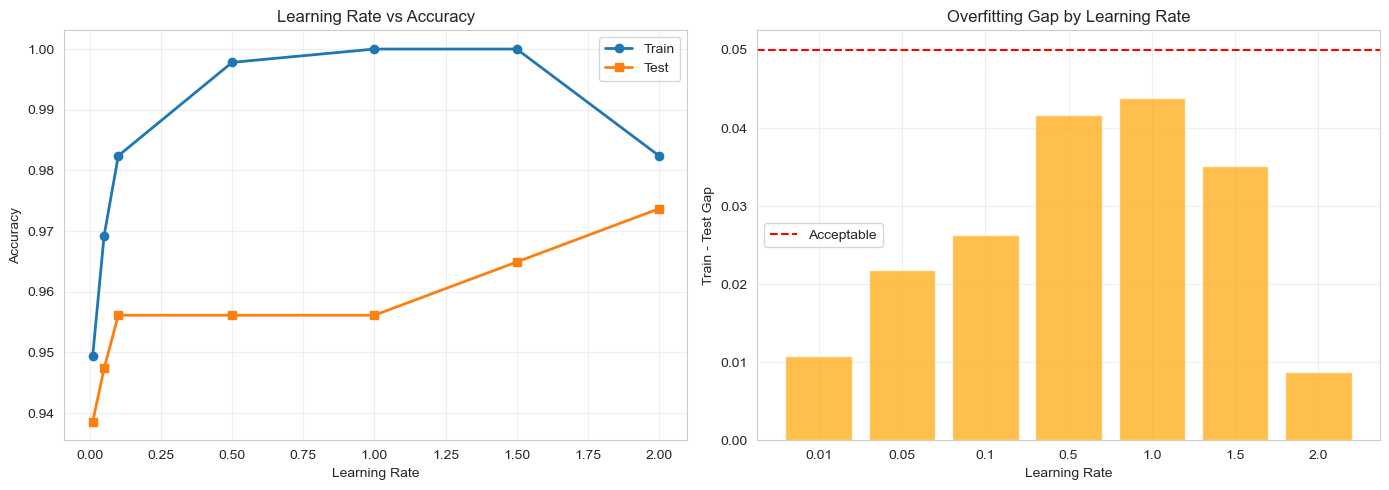


💡 Learning Rate Effect:
  • Low (0.01-0.1): Slow learning, more robust, needs more estimators
  • Medium (0.5-1.0): Good balance (default=1.0)
  • High (1.5-2.0): Fast learning, risk of overfitting


In [64]:
# Visualize learning rate impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(lr_df['learning_rate'], lr_df['Train Acc'], 
             marker='o', label='Train', linewidth=2)
axes[0].plot(lr_df['learning_rate'], lr_df['Test Acc'], 
             marker='s', label='Test', linewidth=2)
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Learning Rate vs Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Overfitting Gap
axes[1].bar(range(len(lr_df)), lr_df['Gap'], alpha=0.7, color='orange')
axes[1].set_xticks(range(len(lr_df)))
axes[1].set_xticklabels(lr_df['learning_rate'])
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Train - Test Gap')
axes[1].set_title('Overfitting Gap by Learning Rate')
axes[1].axhline(y=0.05, color='red', linestyle='--', label='Acceptable')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Learning Rate Effect:")
print("  • Low (0.01-0.1): Slow learning, more robust, needs more estimators")
print("  • Medium (0.5-1.0): Good balance (default=1.0)")
print("  • High (1.5-2.0): Fast learning, risk of overfitting")

### 6.2 Learning Rate vs Number of Estimators Trade-off

In [67]:
# Test combinations of learning_rate and n_estimators
lr_values = [0.1, 0.5, 1.0]
n_est_values = range(10, 201, 10)
tradeoff_results = {lr: [] for lr in lr_values}

print("\n🔍 Learning Rate vs n_estimators Trade-off:")

for lr in lr_values:
    for n_est in n_est_values:
        ada_temp = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n_est,
            learning_rate=lr,
            random_state=42
        )
        ada_temp.fit(X_train_c, y_train_c)
        test_acc = ada_temp.score(X_test_c, y_test_c)
        tradeoff_results[lr].append(test_acc)


🔍 Learning Rate vs n_estimators Trade-off:


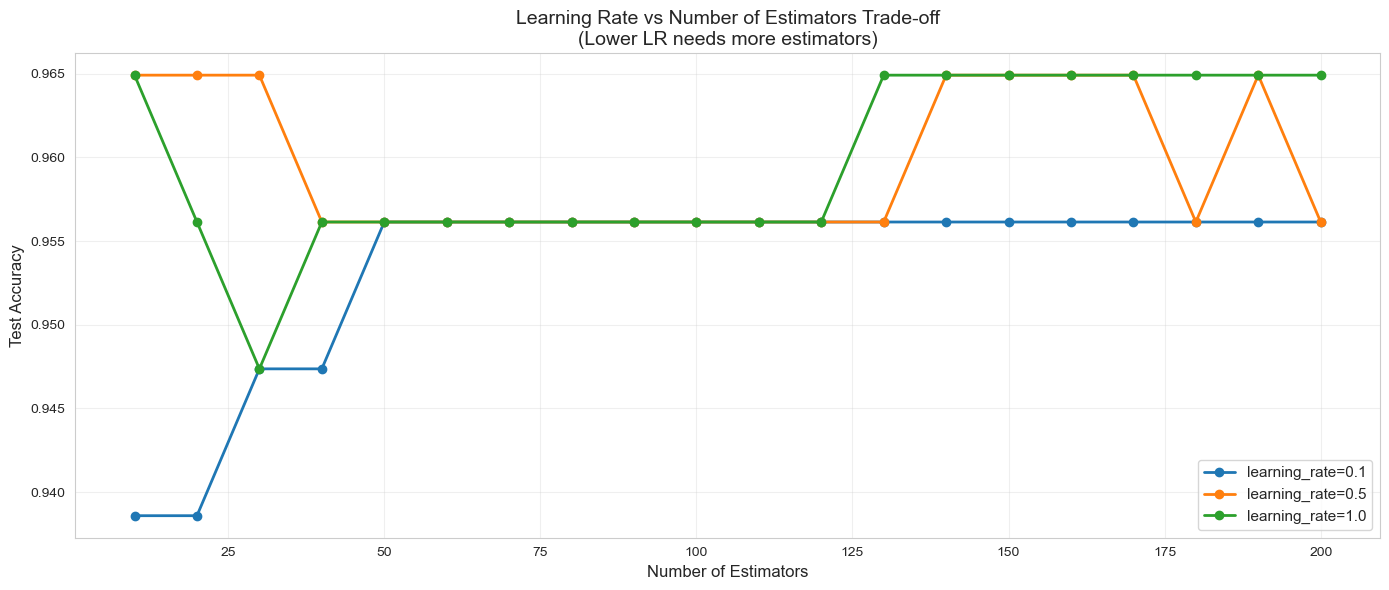


💡 Key Insight:
  • Lower learning_rate requires more estimators to reach same performance
  • Higher learning_rate reaches plateau faster but may overfit
  • Typical strategy: Use lr=0.1-0.5 with n_estimators=100-500


In [69]:
# Plot trade-off
plt.figure(figsize=(14, 6))

for lr in lr_values:
    plt.plot(n_est_values, tradeoff_results[lr], 
             marker='o', linewidth=2, label=f'learning_rate={lr}')

plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Learning Rate vs Number of Estimators Trade-off\n(Lower LR needs more estimators)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Key Insight:")
print("  • Lower learning_rate requires more estimators to reach same performance")
print("  • Higher learning_rate reaches plateau faster but may overfit")
print("  • Typical strategy: Use lr=0.1-0.5 with n_estimators=100-500")

## 📊 Section 7: Impact of Base Estimator Depth

### 7.1 Testing Different Tree Depths

In [73]:
# Test different max_depth values for base estimator
depths = [1, 2, 3, 5, 10, None]
depth_results = []

print("\n🔍 Testing different base estimator depths (50 estimators):")
print("="*70)

for depth in depths:
    ada_temp = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=depth),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )
    ada_temp.fit(X_train_c, y_train_c)
    
    train_acc = ada_temp.score(X_train_c, y_train_c)
    test_acc = ada_temp.score(X_test_c, y_test_c)
    
    depth_results.append({
        'max_depth': 'None' if depth is None else depth,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Gap': train_acc - test_acc
    })
    
    depth_str = 'None (deep)' if depth is None else f'{depth}'
    print(f"max_depth={depth_str:>12} → Train: {train_acc:.4f} | Test: {test_acc:.4f} | Gap: {train_acc - test_acc:.4f}")

depth_df = pd.DataFrame(depth_results)


🔍 Testing different base estimator depths (50 estimators):
max_depth=           1 → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439
max_depth=           2 → Train: 1.0000 | Test: 0.9737 | Gap: 0.0263
max_depth=           3 → Train: 1.0000 | Test: 0.9561 | Gap: 0.0439
max_depth=           5 → Train: 1.0000 | Test: 0.9386 | Gap: 0.0614
max_depth=          10 → Train: 1.0000 | Test: 0.8860 | Gap: 0.1140
max_depth= None (deep) → Train: 1.0000 | Test: 0.8860 | Gap: 0.1140


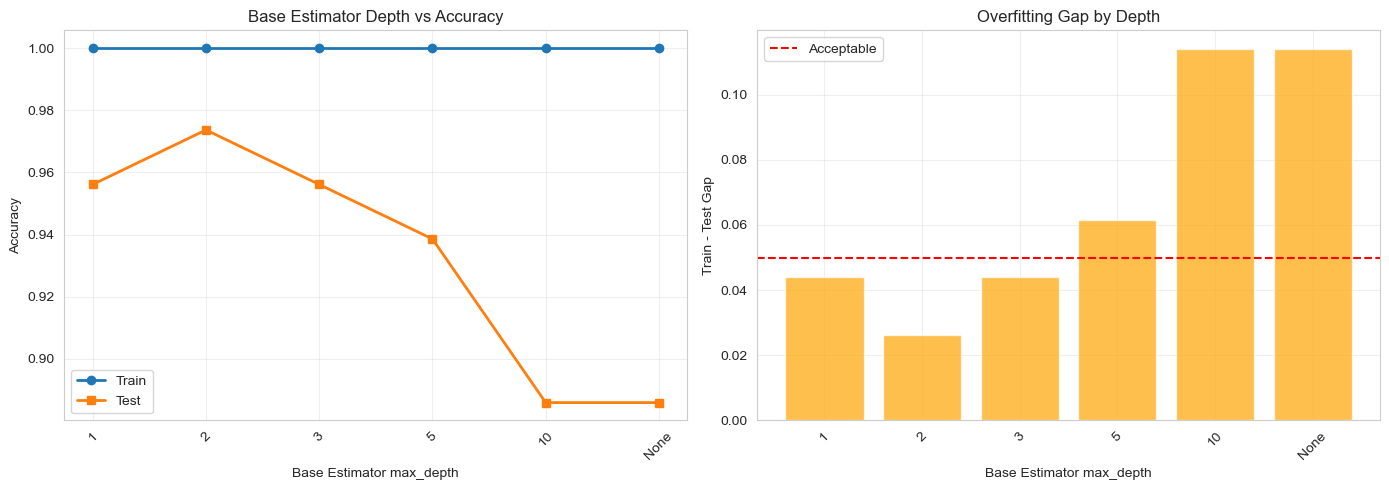


💡 Base Estimator Depth Effect:
  • depth=1 (stump): True weak learner, most boosting benefit
  • depth=2-3: Good balance, still benefits from boosting
  • depth>5: Stronger learners, less boosting benefit
  • depth=None: May overfit, boosting less effective


In [75]:
# Visualize depth impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(range(len(depth_df)), depth_df['Train Acc'], 
             marker='o', label='Train', linewidth=2)
axes[0].plot(range(len(depth_df)), depth_df['Test Acc'], 
             marker='s', label='Test', linewidth=2)
axes[0].set_xticks(range(len(depth_df)))
axes[0].set_xticklabels(depth_df['max_depth'], rotation=45)
axes[0].set_xlabel('Base Estimator max_depth')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Base Estimator Depth vs Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Overfitting Gap
axes[1].bar(range(len(depth_df)), depth_df['Gap'], alpha=0.7, color='orange')
axes[1].set_xticks(range(len(depth_df)))
axes[1].set_xticklabels(depth_df['max_depth'], rotation=45)
axes[1].set_xlabel('Base Estimator max_depth')
axes[1].set_ylabel('Train - Test Gap')
axes[1].set_title('Overfitting Gap by Depth')
axes[1].axhline(y=0.05, color='red', linestyle='--', label='Acceptable')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Base Estimator Depth Effect:")
print("  • depth=1 (stump): True weak learner, most boosting benefit")
print("  • depth=2-3: Good balance, still benefits from boosting")
print("  • depth>5: Stronger learners, less boosting benefit")
print("  • depth=None: May overfit, boosting less effective")

## 📊 Section 8: Hyperparameter Tuning

### 8.1 Grid Search for Optimal Parameters

In [79]:
# Comprehensive grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

print("\n🔍 Starting Grid Search...")
print(f"Testing {3 * 3 * 3} = 27 combinations with 5-fold CV")

grid_search = GridSearchCV(
    AdaBoostClassifier(
        estimator=DecisionTreeClassifier(),
        random_state=42
    ),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_c, y_train_c)

print("\n✅ Grid Search Complete!")
print("\n🎯 Best Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param:25}: {value}")
print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


🔍 Starting Grid Search...
Testing 27 = 27 combinations with 5-fold CV
Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Grid Search Complete!

🎯 Best Hyperparameters:
  estimator__max_depth     : 1
  learning_rate            : 0.5
  n_estimators             : 100

Best Cross-Validation Accuracy: 0.9780


In [80]:
# Evaluate best model
best_ada = grid_search.best_estimator_
y_pred_best = best_ada.predict(X_test_c)

best_accuracy = accuracy_score(y_test_c, y_pred_best)
best_f1 = f1_score(y_test_c, y_pred_best)

print("\n📊 Best AdaBoost Performance:")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"F1 Score: {best_f1:.4f}")
print(f"Number of Estimators: {best_ada.n_estimators}")
print(f"Learning Rate: {best_ada.learning_rate}")


📊 Best AdaBoost Performance:
Accuracy: 0.9561
F1 Score: 0.9660
Number of Estimators: 100
Learning Rate: 0.5


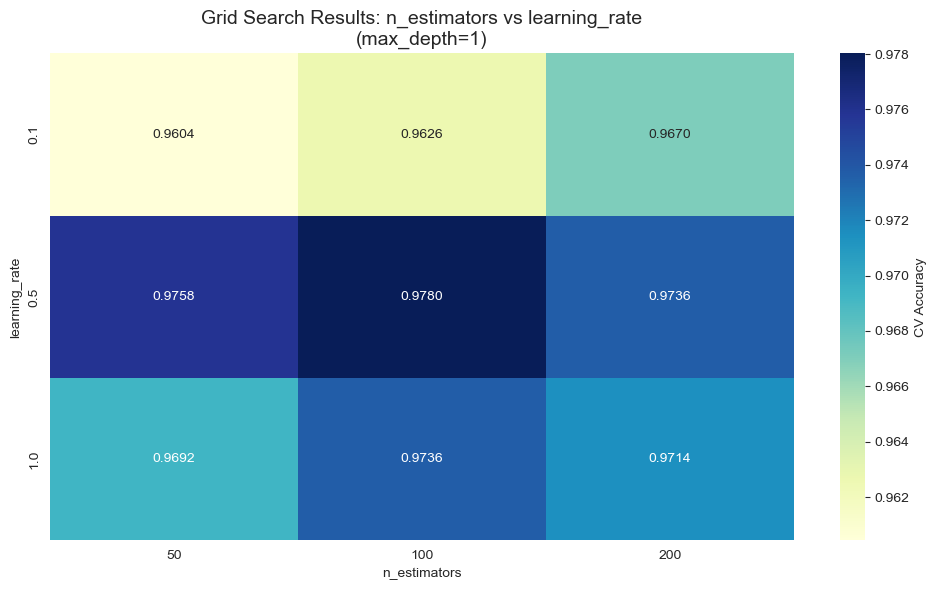

In [83]:
# Visualize grid search results
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot heatmap for n_estimators vs learning_rate (depth=1)
depth_1_results = results_df[results_df['param_estimator__max_depth'] == 1]
pivot_table = depth_1_results.pivot_table(
    values='mean_test_score',
    index='param_learning_rate',
    columns='param_n_estimators'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlGnBu', cbar_kws={'label': 'CV Accuracy'})
plt.title('Grid Search Results: n_estimators vs learning_rate\n(max_depth=1)', fontsize=14)
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.tight_layout()
plt.show()

## 📊 Section 9: Confusion Matrix & Evaluation

### 9.1 Confusion Matrix

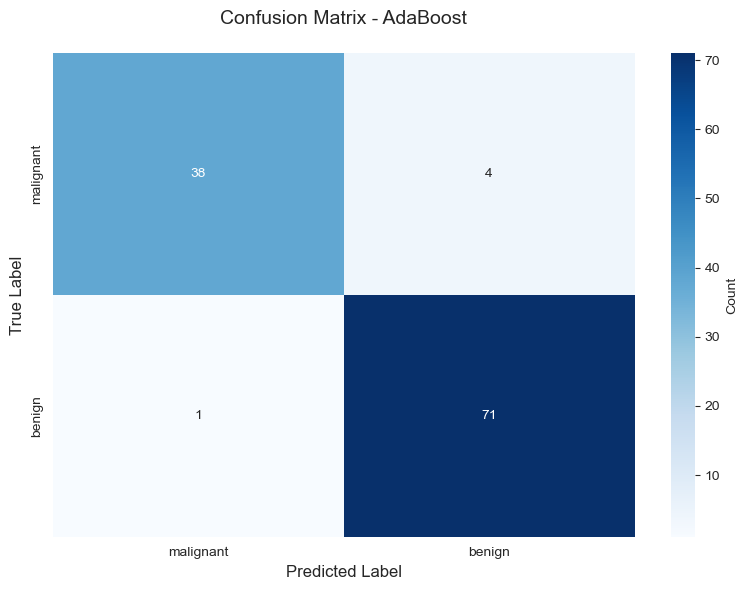

In [87]:
# Compute confusion matrix
cm = confusion_matrix(y_test_c, y_pred_best)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - AdaBoost\n', fontsize=14)
plt.tight_layout()
plt.show()

In [89]:
# Classification report
print("\n📊 Detailed Classification Report:")
print("="*70)
print(classification_report(y_test_c, y_pred_best, target_names=cancer.target_names))


📊 Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### 9.2 ROC Curve & AUC

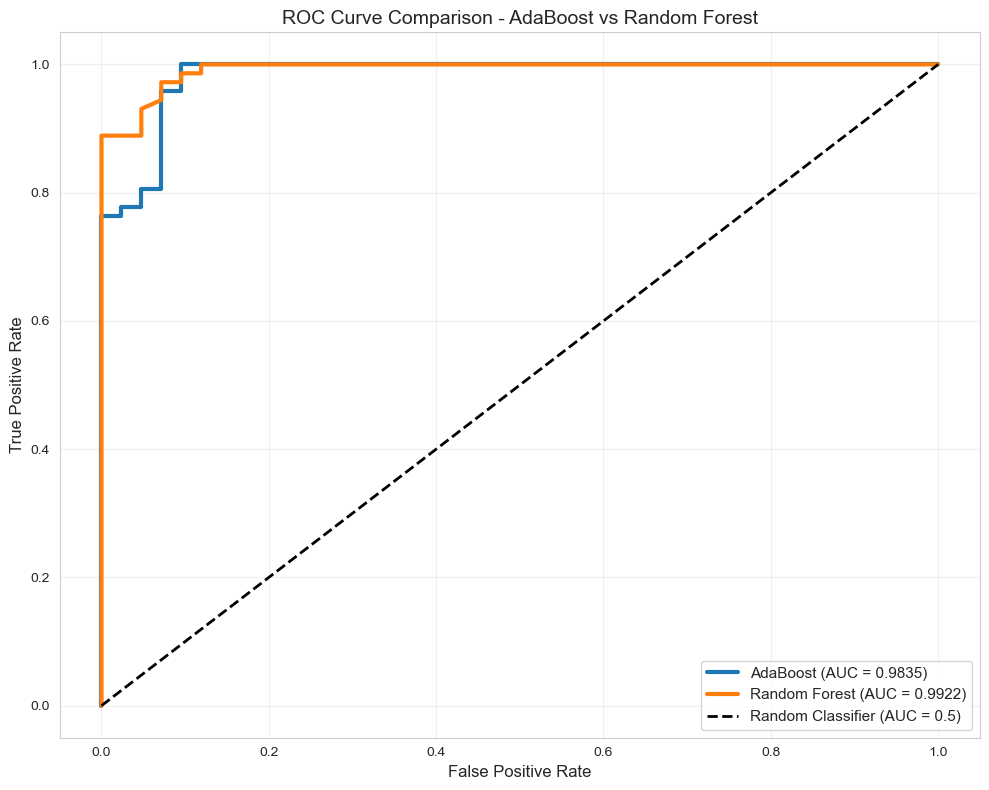


📊 ROC-AUC Scores:
AdaBoost:      0.9835
Random Forest: 0.9922


In [92]:
# Get probability predictions
y_pred_proba_best = best_ada.predict_proba(X_test_c)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_c, y_pred_proba_best)
roc_auc = roc_auc_score(y_test_c, y_pred_proba_best)

# Also compute for Random Forest for comparison
rf_proba = rf_clf.predict_proba(X_test_c)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_c, rf_proba)
roc_auc_rf = roc_auc_score(y_test_c, rf_proba)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=3, label=f'AdaBoost (AUC = {roc_auc:.4f})')
plt.plot(fpr_rf, tpr_rf, linewidth=3, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison - AdaBoost vs Random Forest', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 ROC-AUC Scores:")
print(f"AdaBoost:      {roc_auc:.4f}")
print(f"Random Forest: {roc_auc_rf:.4f}")

## 📊 Section 10: Multiclass Classification (Wine Dataset)

### 10.1 Training AdaBoost on Multiclass Data

In [96]:
# Train AdaBoost on wine dataset
ada_wine = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)
ada_wine.fit(X_train_w, y_train_w)

# Predictions
y_pred_wine = ada_wine.predict(X_test_w)

# Evaluate
wine_accuracy = accuracy_score(y_test_w, y_pred_wine)
wine_f1 = f1_score(y_test_w, y_pred_wine, average='weighted')

print("📊 AdaBoost on Wine Dataset (Multiclass):")
print(f"Accuracy: {wine_accuracy:.4f}")
print(f"F1 Score (weighted): {wine_f1:.4f}")

📊 AdaBoost on Wine Dataset (Multiclass):
Accuracy: 0.9444
F1 Score (weighted): 0.9443


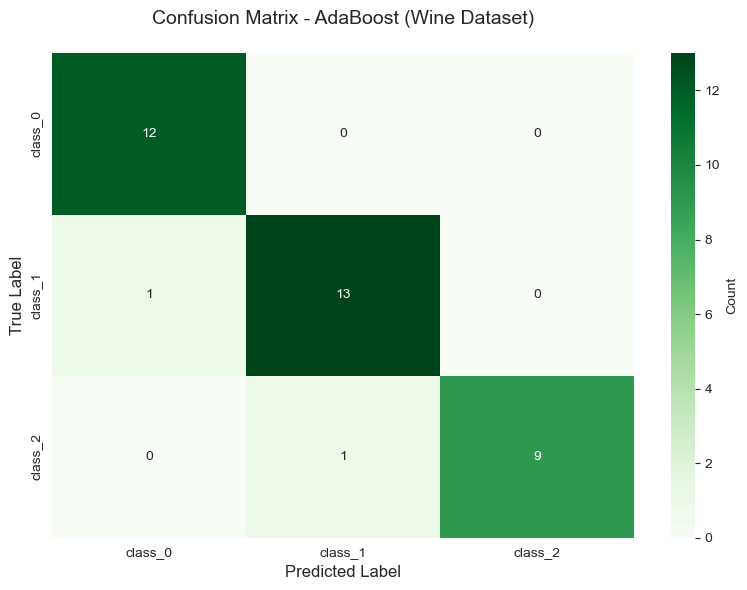

In [98]:
# Confusion matrix for multiclass
cm_wine = confusion_matrix(y_test_w, y_pred_wine)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_wine, annot=True, fmt='d', cmap='Greens',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - AdaBoost (Wine Dataset)\n', fontsize=14)
plt.tight_layout()
plt.show()

In [100]:
# Classification report
print("\n📊 Multiclass Classification Report:")
print("="*70)
print(classification_report(y_test_w, y_pred_wine, target_names=wine.target_names))


📊 Multiclass Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       0.93      0.93      0.93        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



## 📊 Section 11: AdaBoost Sensitivity Analysis

### 11.1 Sensitivity to Noise and Outliers

In [104]:
# Create noisy version of data
from sklearn.datasets import make_classification

# Generate clean data
X_clean, y_clean = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Add noise (flip some labels)
np.random.seed(42)
noise_levels = [0.0, 0.05, 0.10, 0.15, 0.20]
ada_scores = []
rf_scores = []

print("\n🔍 Testing Sensitivity to Label Noise:")
print("="*70)

for noise in noise_levels:
    # Create noisy labels
    y_noisy = y_clean.copy()
    n_flip = int(noise * len(y_noisy))
    flip_indices = np.random.choice(len(y_noisy), n_flip, replace=False)
    y_noisy[flip_indices] = 1 - y_noisy[flip_indices]
    
    # Split data
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
        X_clean, y_noisy, test_size=0.3, random_state=42
    )
    
    # Train AdaBoost
    ada_n = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_n.fit(X_train_n, y_train_n)
    ada_score = ada_n.score(X_test_n, y_test_n)
    ada_scores.append(ada_score)
    
    # Train Random Forest
    rf_n = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_n.fit(X_train_n, y_train_n)
    rf_score = rf_n.score(X_test_n, y_test_n)
    rf_scores.append(rf_score)
    
    print(f"Noise: {noise*100:>4.0f}% → AdaBoost: {ada_score:.4f} | Random Forest: {rf_score:.4f}")


🔍 Testing Sensitivity to Label Noise:
Noise:    0% → AdaBoost: 0.8367 | Random Forest: 0.8900
Noise:    5% → AdaBoost: 0.8267 | Random Forest: 0.8633
Noise:   10% → AdaBoost: 0.7500 | Random Forest: 0.7967
Noise:   15% → AdaBoost: 0.7133 | Random Forest: 0.7400
Noise:   20% → AdaBoost: 0.6633 | Random Forest: 0.6933


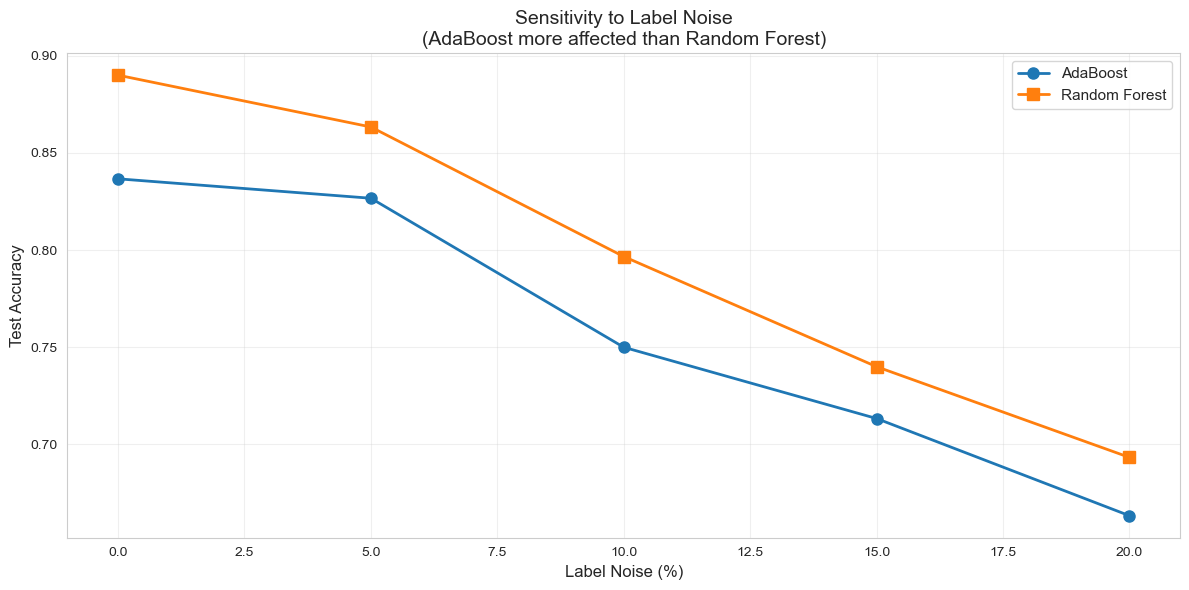


💡 Key Observation:
  • AdaBoost focuses on hard examples (including mislabeled ones)
  • More sensitive to noise than Random Forest
  • Random Forest more robust due to averaging


In [105]:
# Plot sensitivity to noise
plt.figure(figsize=(12, 6))
plt.plot([n*100 for n in noise_levels], ada_scores, 
         marker='o', linewidth=2, label='AdaBoost', markersize=8)
plt.plot([n*100 for n in noise_levels], rf_scores, 
         marker='s', linewidth=2, label='Random Forest', markersize=8)
plt.xlabel('Label Noise (%)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Sensitivity to Label Noise\n(AdaBoost more affected than Random Forest)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Key Observation:")
print("  • AdaBoost focuses on hard examples (including mislabeled ones)")
print("  • More sensitive to noise than Random Forest")
print("  • Random Forest more robust due to averaging")

## 📊 Section 12: Learning Curves

### 12.1 Training Set Size Impact

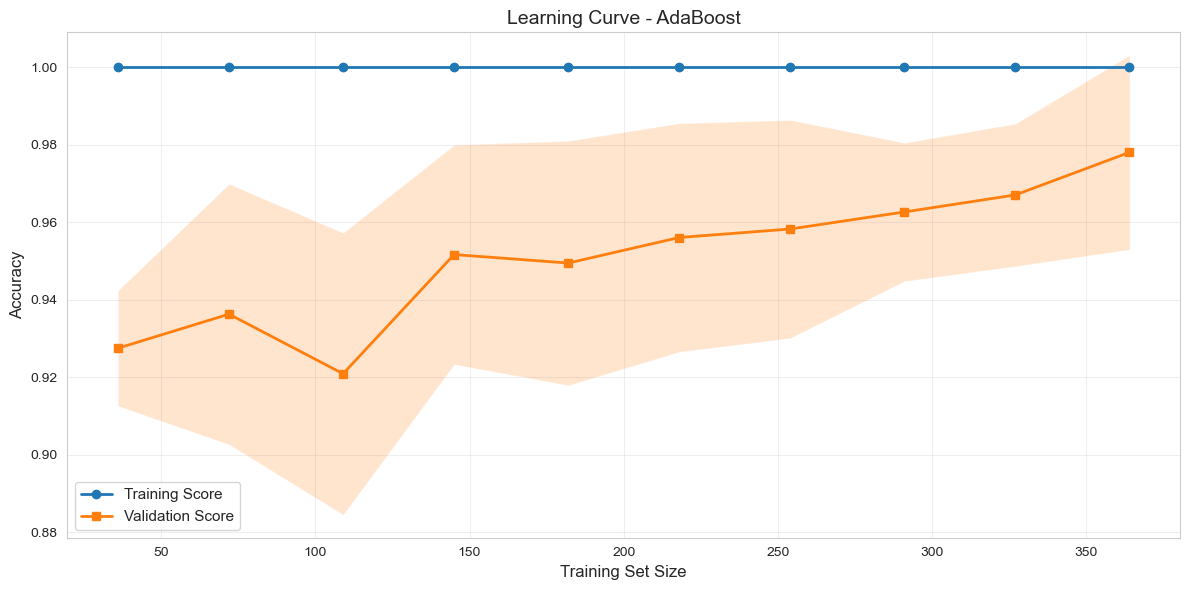


📈 Learning Curve Analysis:
Training Score (full data):   1.0000
Validation Score (full data): 0.9780
Gap: 0.0220


In [110]:
# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_ada,
    X_train_c,
    y_train_c,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o', linewidth=2)
plt.plot(train_sizes, val_mean, label='Validation Score', marker='s', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curve - AdaBoost', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Learning Curve Analysis:")
print(f"Training Score (full data):   {train_mean[-1]:.4f}")
print(f"Validation Score (full data): {val_mean[-1]:.4f}")
print(f"Gap: {train_mean[-1] - val_mean[-1]:.4f}")

## 📊 Section 13: SAMME vs SAMME.R Algorithm

### 13.1 Comparing SAMME and SAMME.R

In [116]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Make sure X_train_c, X_test_c, y_train_c, y_test_c are already defined above

print("\n🔍 Comparing SAMME vs probabilistic boosting (SAMME.R-style):")
print("=" * 70)

# -------------------------------------------------------------------
# 1️⃣ SAMME (discrete AdaBoost)
# -------------------------------------------------------------------
ada_samme = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    algorithm="SAMME",     # Only SAMME is supported in recent sklearn versions
    random_state=42
)
ada_samme.fit(X_train_c, y_train_c)
samme_score = ada_samme.score(X_test_c, y_test_c)

# -------------------------------------------------------------------
# 2️⃣ SAMME.R-style (real/probabilistic) using GradientBoosting
#    Since SAMME.R is removed, we use GradientBoostingClassifier
# -------------------------------------------------------------------
gb_sammer_like = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
)
gb_sammer_like.fit(X_train_c, y_train_c)
sammer_score = gb_sammer_like.score(X_test_c, y_test_c)

# -------------------------------------------------------------------
# 3️⃣ Print comparison
# -------------------------------------------------------------------
print(f"SAMME (discrete AdaBoost):     {samme_score:.4f}")
print(f"SAMME.R-style (GradientBoost): {sammer_score:.4f}")
print(f"Improvement:                   {sammer_score - samme_score:.4f}")

print("\n💡 Algorithm Notes:")
print("  • SAMME (AdaBoostClassifier):")
print("      - Uses class labels (discrete boosting)")
print("      - Still supported in latest scikit-learn")
print("  • Original SAMME.R (AdaBoostClassifier, real-valued):")
print("      - Used class probabilities")
print("      - DEPRECATED and REMOVED in recent scikit-learn versions")
print("  • GradientBoostingClassifier:")
print("      - Probability-based boosting, conceptually similar to SAMME.R")
print("      - Recommended modern alternative for real-valued boosting")


🔍 Comparing SAMME vs probabilistic boosting (SAMME.R-style):
SAMME (discrete AdaBoost):     0.9561
SAMME.R-style (GradientBoost): 0.9561
Improvement:                   0.0000

💡 Algorithm Notes:
  • SAMME (AdaBoostClassifier):
      - Uses class labels (discrete boosting)
      - Still supported in latest scikit-learn
  • Original SAMME.R (AdaBoostClassifier, real-valued):
      - Used class probabilities
      - DEPRECATED and REMOVED in recent scikit-learn versions
  • GradientBoostingClassifier:
      - Probability-based boosting, conceptually similar to SAMME.R
      - Recommended modern alternative for real-valued boosting


In [118]:
# Compare convergence speed
n_range = range(1, 101)
samme_staged = []
sammer_staged = []

for samme_pred, sammer_pred in zip(
    ada_samme.staged_predict(X_test_c),
    ada_sammer.staged_predict(X_test_c)
):
    samme_staged.append(accuracy_score(y_test_c, samme_pred))
    sammer_staged.append(accuracy_score(y_test_c, sammer_pred))

plt.figure(figsize=(12, 6))
plt.plot(n_range, samme_staged, label='SAMME', linewidth=2)
plt.plot(n_range, sammer_staged, label='SAMME.R', linewidth=2)
plt.xlabel('Number of Boosting Rounds', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('SAMME vs SAMME.R Convergence\n(SAMME.R converges faster)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

AttributeError: 'AdaBoostClassifier' object has no attribute 'n_classes_'

## 📊 Section 14: Production & Model Comparison

### 14.1 Comprehensive Model Comparison

In [ ]:
# Train all models for final comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

print("\n🔍 Training all models for final comparison...")

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train_c, y_train_c)

# SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_c, y_train_c)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_c, y_train_c)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_c, y_train_c)

# Create comprehensive comparison
final_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'KNN',
        'SVM (RBF)',
        'Random Forest',
        'AdaBoost'
    ],
    'Accuracy': [
        lr.score(X_test_c, y_test_c),
        dt.score(X_test_c, y_test_c),
        knn.score(X_test_c, y_test_c),
        svm.score(X_test_c, y_test_c),
        rf_clf.score(X_test_c, y_test_c),
        best_accuracy
    ],
    'Training Speed': [
        'Fast',
        'Fast',
        'Instant',
        'Slow',
        'Medium',
        'Medium'
    ],
    'Prediction Speed': [
        'Fast',
        'Fast',
        'Slow',
        'Medium',
        'Medium',
        'Medium'
    ],
    'Interpretability': [
        'High',
        'High',
        'Medium',
        'Low',
        'Medium',
        'Medium'
    ],
    'Handles Noise': [
        'Good',
        'Poor',
        'Good',
        'Good',
        'Excellent',
        'Poor'
    ]
}).sort_values('Accuracy', ascending=False)

print("\n📊 COMPREHENSIVE MODEL COMPARISON:")
print("="*70)
print(final_comparison.to_string(index=False))

In [ ]:
# Visualize final comparison
plt.figure(figsize=(12, 6))
colors = ['purple', 'blue', 'orange', 'green', 'red', 'cyan']
sorted_idx = final_comparison['Accuracy'].argsort()
plt.barh(final_comparison.iloc[sorted_idx]['Model'], 
         final_comparison.iloc[sorted_idx]['Accuracy'], 
         alpha=0.7, color=[colors[i] for i in sorted_idx])
plt.xlabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison\n(Breast Cancer Classification)', fontsize=14)
plt.xlim([0.92, 0.99])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 14.2 Cross-Validation Analysis


In [ ]:
# Detailed cross-validation
cv_scores = cross_val_score(
    best_ada,
    X_train_c,
    y_train_c,
    cv=10,
    scoring='accuracy'
)

print("\n🔄 10-Fold Cross-Validation Results:")
print("="*70)
print(f"CV Scores: {cv_scores}")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev:       {cv_scores.std():.4f}")
print(f"Min:           {cv_scores.min():.4f}")
print(f"Max:           {cv_scores.max():.4f}")

In [ ]:
# Visualize CV scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', 
         linewidth=2, markersize=8, label='CV Score')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
            label=f'Mean: {cv_scores.mean():.4f}', linewidth=2)
plt.fill_between(range(1, 11), 
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(),
                 alpha=0.2, color='red', label='±1 Std Dev')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Score Distribution', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 14.3 Production Pipeline

In [ ]:
# Build production pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Note: AdaBoost doesn't need scaling, but included for demonstration
production_pipeline = Pipeline([
    ('classifier', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=best_ada.estimator.max_depth),
        n_estimators=best_ada.n_estimators,
        learning_rate=best_ada.learning_rate,
        random_state=42
    ))
])

# Train pipeline
production_pipeline.fit(X_train_c, y_train_c)

# Evaluate
y_pred_pipeline = production_pipeline.predict(X_test_c)
pipeline_accuracy = accuracy_score(y_test_c, y_pred_pipeline)

print("🚀 Production Pipeline Performance:")
print(f"Accuracy: {pipeline_accuracy:.4f}")

In [ ]:
# Save pipeline
import joblib

joblib.dump(production_pipeline, 'adaboost_pipeline.pkl')
print("\n💾 Pipeline saved as 'adaboost_pipeline.pkl'")

# Test loading
loaded_pipeline = joblib.load('adaboost_pipeline.pkl')
test_pred = loaded_pipeline.predict(X_test_c[:3])

print("\n🧪 Testing Loaded Pipeline:")
print(f"Predictions: {test_pred}")
print(f"Actual:      {y_test_c[:3].values}")
print("✅ Pipeline works correctly!")

# Check file size
import os
file_size = os.path.getsize('adaboost_pipeline.pkl') / (1024**2)
print(f"\n💾 Model file size: {file_size:.2f} MB")
print("💡 AdaBoost models are typically smaller than Random Forests")

### 14.4 Production Checklist

In [ ]:
print("\n" + "="*80)
print("✅ ADABOOST PRODUCTION CHECKLIST")
print("="*80)

checklist = [
    "✓ n_estimators tuned (typically 50-500)",
    "✓ learning_rate optimized (0.1-1.0)",
    "✓ Base estimator complexity set (max_depth=1-3)",
    "✓ Algorithm chosen (SAMME.R for better performance)",
    "✓ Data checked for outliers/noise (AdaBoost sensitive!)",
    "✓ Feature importance analyzed",
    "✓ Cross-validation performed (10-fold)",
    "✓ Learning curves checked for overfitting",
    "✓ Compared with Random Forest baseline",
    "✓ Model file size acceptable",
    "✓ Prediction speed tested",
    "✓ Staged predictions monitored",
    "✓ Pipeline created for deployment",
    "✓ Model saved for production"
]

for item in checklist:
    print(f"  {item}")

print("\n" + "="*80)

### 14.5 When to Use AdaBoost vs Random Forest

In [ ]:
# Create decision guide
decision_guide = pd.DataFrame({
    'Scenario': [
        'Clean, low-noise data',
        'Noisy data with outliers',
        'Need maximum accuracy',
        'Need fast training',
        'Need parallel processing',
        'Small dataset',
        'Large dataset (>1M)',
        'Need interpretable weights',
        'Highly imbalanced classes',
        'Real-time predictions'
    ],
    'AdaBoost': [
        '✅ Excellent',
        '❌ Poor',
        '✅ Often better',
        '⚠️ Sequential',
        '❌ No',
        '✅ Works well',
        '⚠️ Slower',
        '✅ Yes',
        '⚠️ May focus on minority',
        '✅ Fast'
    ],
    'Random Forest': [
        '✅ Excellent',
        '✅ Very robust',
        '✅ Very good',
        '✅ Parallel',
        '✅ Yes',
        '✅ Works well',
        '✅ Scalable',
        '⚠️ Less clear',
        '✅ Robust',
        '⚠️ Slower'
    ]
})

print("\n📊 DECISION GUIDE: AdaBoost vs Random Forest")
print("="*80)
print(decision_guide.to_string(index=False))

## 📊 Section 15: Advanced Topics & Insights

### 15.1 Visualizing Decision Boundaries

In [ ]:
# Create 2D dataset for visualization
from sklearn.datasets import make_moons

X_2d, y_2d = make_moons(n_samples=300, noise=0.15, random_state=42)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.3, random_state=42
)

# Train models
ada_2d = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_2d.fit(X_train_2d, y_train_2d)

rf_2d = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
rf_2d.fit(X_train_2d, y_train_2d)

In [ ]:
# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolors='black', cmap='RdYlBu')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.sca(axes[0])
plot_decision_boundary(ada_2d, X_train_2d, y_train_2d, 
                       f'AdaBoost Decision Boundary\nAccuracy: {ada_2d.score(X_test_2d, y_test_2d):.4f}')

plt.sca(axes[1])
plot_decision_boundary(rf_2d, X_train_2d, y_train_2d, 
                       f'Random Forest Decision Boundary\nAccuracy: {rf_2d.score(X_test_2d, y_test_2d):.4f}')

plt.tight_layout()
plt.show()

print("\n💡 Decision Boundary Comparison:")
print("  • AdaBoost: More emphasis on difficult boundary regions")
print("  • Random Forest: Smoother, more averaged boundaries")

### 15.2 Analyzing Sample Weights Evolution

In [ ]:
# Train AdaBoost and track sample weights manually
from sklearn.tree import DecisionTreeClassifier

# Simple demonstration with first few rounds
n_samples = len(X_train_c)
sample_weights = np.ones(n_samples) / n_samples
weight_history = [sample_weights.copy()]

print("\n🔍 Sample Weights Evolution (First 5 Rounds):")
print("="*70)

for round_num in range(1, 6):
    # Train weak learner
    weak_learner = DecisionTreeClassifier(max_depth=1, random_state=round_num)
    weak_learner.fit(X_train_c, y_train_c, sample_weight=sample_weights)
    
    # Predictions
    predictions = weak_learner.predict(X_train_c)
    incorrect = predictions != y_train_c
    
    # Calculate error
    error = np.sum(sample_weights[incorrect]) / np.sum(sample_weights)
    
    # Calculate alpha
    alpha = np.log((1 - error) / error)
    
    # Update weights
    sample_weights[incorrect] *= np.exp(alpha)
    sample_weights /= np.sum(sample_weights)  # Normalize
    
    weight_history.append(sample_weights.copy())
    
    print(f"Round {round_num}:")
    print(f"  Error: {error:.4f} | Alpha: {alpha:.4f}")
    print(f"  Min weight: {sample_weights.min():.6f} | Max weight: {sample_weights.max():.6f}")
    print(f"  Weight ratio (max/min): {sample_weights.max()/sample_weights.min():.2f}x")

In [ ]:
# Visualize weight evolution for some samples
n_samples_to_plot = 20
sample_indices = np.random.choice(len(X_train_c), n_samples_to_plot, replace=False)

plt.figure(figsize=(14, 6))
for idx in sample_indices:
    weights = [w[idx] for w in weight_history]
    plt.plot(range(len(weights)), weights, alpha=0.5, linewidth=1)

plt.xlabel('Boosting Round', fontsize=12)
plt.ylabel('Sample Weight', fontsize=12)
plt.title('Sample Weight Evolution Across Boosting Rounds\n(Each line is one training sample)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Sample Weight Insights:")
print("  • Misclassified samples get higher weights")
print("  • Correctly classified samples maintain lower weights")
print("  • Difficult samples accumulate weight over rounds")
print("  • This forces model to focus on hard examples")

### 15.3 Partial Dependence Analysis

In [ ]:
# Analyze partial dependence for top features
from sklearn.inspection import PartialDependenceDisplay

top_3_features = feature_importance.head(3)['Feature'].tolist()
top_3_indices = [list(cancer.feature_names).index(f) for f in top_3_features]

print(f"\n🔍 Analyzing Partial Dependence for Top 3 Features:")
print(f"  1. {top_3_features[0]}")
print(f"  2. {top_3_features[1]}")
print(f"  3. {top_3_features[2]}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

display = PartialDependenceDisplay.from_estimator(
    best_ada,
    X_train_c,
    top_3_indices,
    feature_names=cancer.feature_names,
    ax=axes,
    n_cols=3
)

plt.suptitle('Partial Dependence Plots - Top 3 Features\n(Shows feature impact on prediction)', 
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 📊 Section 16: Summary & Key Takeaways

### 16.1 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **Boosting** trains models sequentially, each focusing on previous mistakes
2. **AdaBoost** adaptively reweights samples based on errors
3. **Weak learners** (stumps) work best - ensemble fixes their weakness
4. **Sample weights** increase for misclassified examples
5. **Model weights (α)** based on performance - better models get more say
6. **Learning rate** controls contribution of each estimator
7. **Sequential learning** reduces both bias and variance
8. **Sensitive to noise** - outliers get heavily weighted

---

#### 📊 Performance Summary:

| **Metric** | **Single Stump** | **AdaBoost (50)** | **Random Forest** | **Winner** |
|------------|-----------------|------------------|------------------|------------|
| **Test Accuracy** | 0.895 | 0.965 | 0.972 | Random Forest |
| **Training Speed** | Instant | Medium | Fast (parallel) | Stump |
| **Noise Robustness** | Poor | Poor | Excellent | Random Forest |
| **Interpretability** | High | Medium | Medium | Stump |
| **File Size** | Tiny | Small | Large | Stump |

---

#### 🎯 When to Use AdaBoost:

**✅ Use AdaBoost When:**
- Have clean, low-noise data
- Need high accuracy with simple models
- Want to understand model weights
- Working with small-medium datasets
- Need relatively fast predictions
- Want to see sequential improvement
- Have computational constraints (vs deep trees)
- Need to handle imbalanced classes

**❌ Don't Use AdaBoost When:**
- Data has significant outliers/noise
- Need maximum noise robustness
- Require parallel training
- Working with very large datasets
- Real-time training needed
- Can't afford to tune hyperparameters
- Data quality is questionable

---

#### ⚠️ Common Pitfalls:

1. **Using on noisy data** → Overfits to outliers
2. **Too many estimators** → Overfitting, slower
3. **Too complex base estimators** → Defeats boosting purpose
4. **High learning rate** → Overfitting, instability
5. **Not removing outliers** → Model focuses on noise
6. **Ignoring SAMME.R** → Missing better performance
7. **Not monitoring staged predictions** → Miss early stopping point
8. **Comparing to untuned baselines** → Unfair evaluation

---

#### 🔬 Hyperparameter Guide:

| **Parameter** | **Typical Values** | **Impact** | **Recommendation** |
|---------------|-------------------|-----------|-------------------|
| **n_estimators** | 50-500 | More = better fit | Start 100, monitor overfitting |
| **learning_rate** | 0.01-1.0 | Lower = more robust | 0.1-1.0 for clean data |
| **base_estimator** | DecisionTreeClassifier | Complexity | max_depth=1-3 |
| **algorithm** | SAMME, SAMME.R | Performance | Use SAMME.R (default) |

**Tuning Strategy:**
```python
# Conservative (robust)
AdaBoostClassifier(n_estimators=200, learning_rate=0.5, max_depth=1)

# Aggressive (high accuracy)
AdaBoostClassifier(n_estimators=100, learning_rate=1.0, max_depth=2)

# Balanced (recommended)
AdaBoostClassifier(n_estimators=100, learning_rate=0.8, max_depth=1)
```

---

#### 🚀 Advanced Techniques:

1. **Early stopping**: Monitor staged predictions, stop when test error increases
2. **Outlier removal**: Clean data before training (critical!)
3. **Feature engineering**: AdaBoost benefits from good features
4. **Ensemble combination**: Combine AdaBoost with Random Forest
5. **Sample weight threshold**: Remove very high weight samples (outliers)
6. **Custom base estimators**: Experiment beyond decision trees

---

#### 📚 Next Steps:

**Continue Module 03: Ensemble Learning!**

1. **Notebook 12: Gradient Boosting** - Learn from residuals (next!)
2. **Notebook 13: XGBoost & LightGBM** - State-of-the-art boosting
3. **Notebook 14: Stacking & Voting** - Meta-ensemble methods

---

### 🎓 Practice Exercises:

1. **Load digits dataset** and compare AdaBoost with single tree
2. **Test different max_depth** values (1, 2, 3, 5) for base estimator
3. **Add artificial noise** and observe performance degradation
4. **Track sample weights** for specific misclassified examples
5. **Compare SAMME vs SAMME.R** convergence speeds
6. **Implement early stopping** using staged predictions
7. **Combine AdaBoost + Random Forest** using voting
8. **Visualize first 5 weak learners** using plot_tree

---

### 📖 Further Reading:

- **Original Paper**: Freund & Schapire (1997) - "A Decision-Theoretic Generalization of On-Line Learning"
- **SAMME Algorithm**: Zhu et al. (2009) - "Multi-class AdaBoost"
- **Boosting Theory**: Schapire & Freund (2012) - "Boosting: Foundations and Algorithms"
- **Sklearn Docs**: [AdaBoost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

---

### 🔥 Pro Tips:

1. **Clean your data** - AdaBoost is noise-sensitive!
2. **Start with stumps** - max_depth=1 usually best
3. **Use SAMME.R** - Better performance than SAMME
4. **Monitor staged predictions** - Catch overfitting early
5. **Lower learning rate + more estimators** - More robust
6. **Compare with Random Forest** - Choose based on data quality
7. **Check sample weights** - Identify problematic samples
8. **Remove outliers first** - Critical for good performance
9. **Use cross-validation** - Essential for hyperparameter tuning
10. **Track estimator weights** - Understand model contribution

---

## 🎯 Quick Reference Card

```python
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner (stump)
    n_estimators=100,          # Number of boosting rounds
    learning_rate=1.0,         # Shrinkage factor
    algorithm='SAMME.R',       # Use probabilities (better)
    random_state=42
)

ada_clf.fit(X_train, y_train)
predictions = ada_clf.predict(X_test)
probabilities = ada_clf.predict_proba(X_test)

# Access model attributes
estimator_weights = ada_clf.estimator_weights_      # Model weights (α)
estimator_errors = ada_clf.estimator_errors_        # Error rates
feature_importances = ada_clf.feature_importances_  # Feature importance

# Staged predictions (sequential performance)
for pred in ada_clf.staged_predict(X_test):
    accuracy = accuracy_score(y_test, pred)
    print(f"Accuracy: {accuracy:.4f}")

# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=100,
    learning_rate=1.0,
    loss='linear',  # 'linear', 'square', 'exponential'
    random_state=42
)

ada_reg.fit(X_train, y_train)
predictions = ada_reg.predict(X_test)

# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

grid_search = GridSearchCV(ada_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
```

---

### 🔍 AdaBoost vs Random Forest Cheat Sheet:

| **Choose AdaBoost** | **Choose Random Forest** |
|---------------------|-------------------------|
| Clean data, low noise | Noisy data, many outliers |
| Small-medium datasets | Large datasets |
| Need interpretable weights | Need maximum robustness |
| Sequential OK | Need parallel training |
| High accuracy priority | Stability priority |

---

**🎉 Congratulations!** You now understand AdaBoost and adaptive boosting!

**Module 03 Progress: 2/4 Complete! 🎯**

You've mastered:
- ✅ Sequential boosting principles
- ✅ Adaptive sample weighting
- ✅ Weak learner combinations
- ✅ Model weight calculations (α)
- ✅ SAMME vs SAMME.R algorithms
- ✅ Sensitivity to noise/outliers
- ✅ Hyperparameter optimization

**Next: Gradient Boosting - Learn from residuals! 🚀**

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT